In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn import preprocessing
from scipy import signal
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import entropy
from scipy.stats import iqr
from statsmodels.tsa.ar_model import AR
import pywt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import scipy.io as spio
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.feature_selection import chi2,f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectFpr,SelectFdr,SelectFwe
from sklearn.feature_selection import SelectPercentile,RFE,RFECV,SelectFromModel
import math
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
file='MA_Gan_MR1.mat'
file2='MA_Gan_MR2.mat'
file3='MA_Gan_MR3.mat'
file4='MA_Gan_MR4.mat'
mat1=spio.loadmat(file)
mat2=spio.loadmat(file2)
mat3=spio.loadmat(file3)
mat4=spio.loadmat(file4)

'MA_Gan_MR1.mat'

In [3]:
sensor_list=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z']
sensor_list_label=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z','label']
datei_list=['D180308_XdK_Akkuschrauber_1_PP','D180308_XdK_Akkuschrauber_2_PP','D180308_XdK_Akkuschrauber_3_PP','D180308_XdK_Akkuschrauber_4_PP','D180308_XdK_Akkuschrauber_5_PP','D180308_XdK_Akkuschrauber_6_PP']


def messreihe(name):
    data=[]
    b=[]
    sensor_data=[]
    Spannung=[]
    a_x=[]
    a_y=[]
    a_z=[]
    phi_1pkt_x=[]
    phi_1pkt_y=[]
    phi_1pkt_z=[]
    magnet_x=[]
    magnet_y=[]
    magnet_z=[]
    sensors=[Spannung,a_x,a_y,a_z,phi_1pkt_x,phi_1pkt_y,phi_1pkt_z,magnet_x,magnet_y,magnet_z]


    for sensor in sensor_list:
        for datei in datei_list:
            a=name['xdkStructs_PP'][datei][0][0][0]['signals_postprocessing'][0][sensor][0][0][0][0][0]
            a=a.reshape(1,a.shape[0])
            data.extend(a)
    for i in range(10):
        for daten in data[6*i:6*(i+1)]:
            sensors[i].extend(daten)
    def sensor_data(i):
        sensoren=pd.DataFrame(sensors[i])
        return sensoren

    df=[sensor_data(i) for i in range(10)]
    df=pd.concat(df,axis=1)
#df=preprocessing.normalize(df)
#b,a=signal.butter(5,0.5,btype='lowpass')
#df=signal.lfilter(b,a,df)
    df=pd.DataFrame(df)
    df.columns=sensor_list
    return df


def label_daten(name):
    label=[]
    labels=[]  

    for datei in datei_list:
        a=name['xdkStructs_PP'][datei][0][0][0]['labels'][0][0][0][0]
        a=a.reshape(1,a.shape[0])
        labels.extend(a)
    for klasse in labels:
        label.extend(klasse)
    label=pd.DataFrame(label)
    return label

df_1=messreihe(mat1)[0:157200]
label_1=label_daten(mat1)[0:157200]
df_2=messreihe(mat2)[0:143200]
label_2=label_daten(mat2)[0:143200]
df_3=messreihe(mat3)[0:141600]
label_3=label_daten(mat3)[0:141600]
df_4=messreihe(mat4)[0:376400]
label_4=label_daten(mat4)[0:376400]
df=pd.concat([df_1,df_2,df_3,df_4],axis=0)
df.index=[i for i in range(len(df_1)+len(df_2)+len(df_3)+len(df_4))]
label=pd.concat([label_1,label_2,label_3,label_4],axis=0)
label.index=[i for i in range(len(df_1)+len(df_2)+len(df_3)+len(df_4))]
df_label=pd.concat([df,label],axis=1)
df_label.columns=sensor_list_label
df_label

,Spannung,a_x,a_y,a_z,phi_1pkt_x,phi_1pkt_y,phi_1pkt_z,magnet_x,magnet_y,magnet_z,label
0,20.234271,101,-1021,91,7202,0,0,26,4,-11,0
1,20.234271,105,-1021,91,11230,1464,-122,26,4,-11,0
2,20.234271,115,-1021,91,11230,1098,-122,26,5,-9,0
3,20.234271,121,-1021,87,11230,1586,1708,26,5,-9,0
4,20.234271,125,-1021,87,14770,1586,1708,26,5,-9,0
5,20.244156,130,-1013,87,15502,1586,1708,26,5,-9,0
6,20.234271,130,-1011,87,17211,3662,854,26,5,-9,0
7,20.234271,130,-1005,82,18798,6835,3417,26,5,-9,0
8,20.234271,126,-1005,80,17211,6835,854,26,5,-9,0
9,20.234271,130,-1005,80,16601,8789,-4150,28,5,-10,0


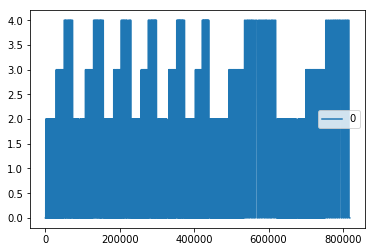

In [4]:
label.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a608390>,
      dtype=object)

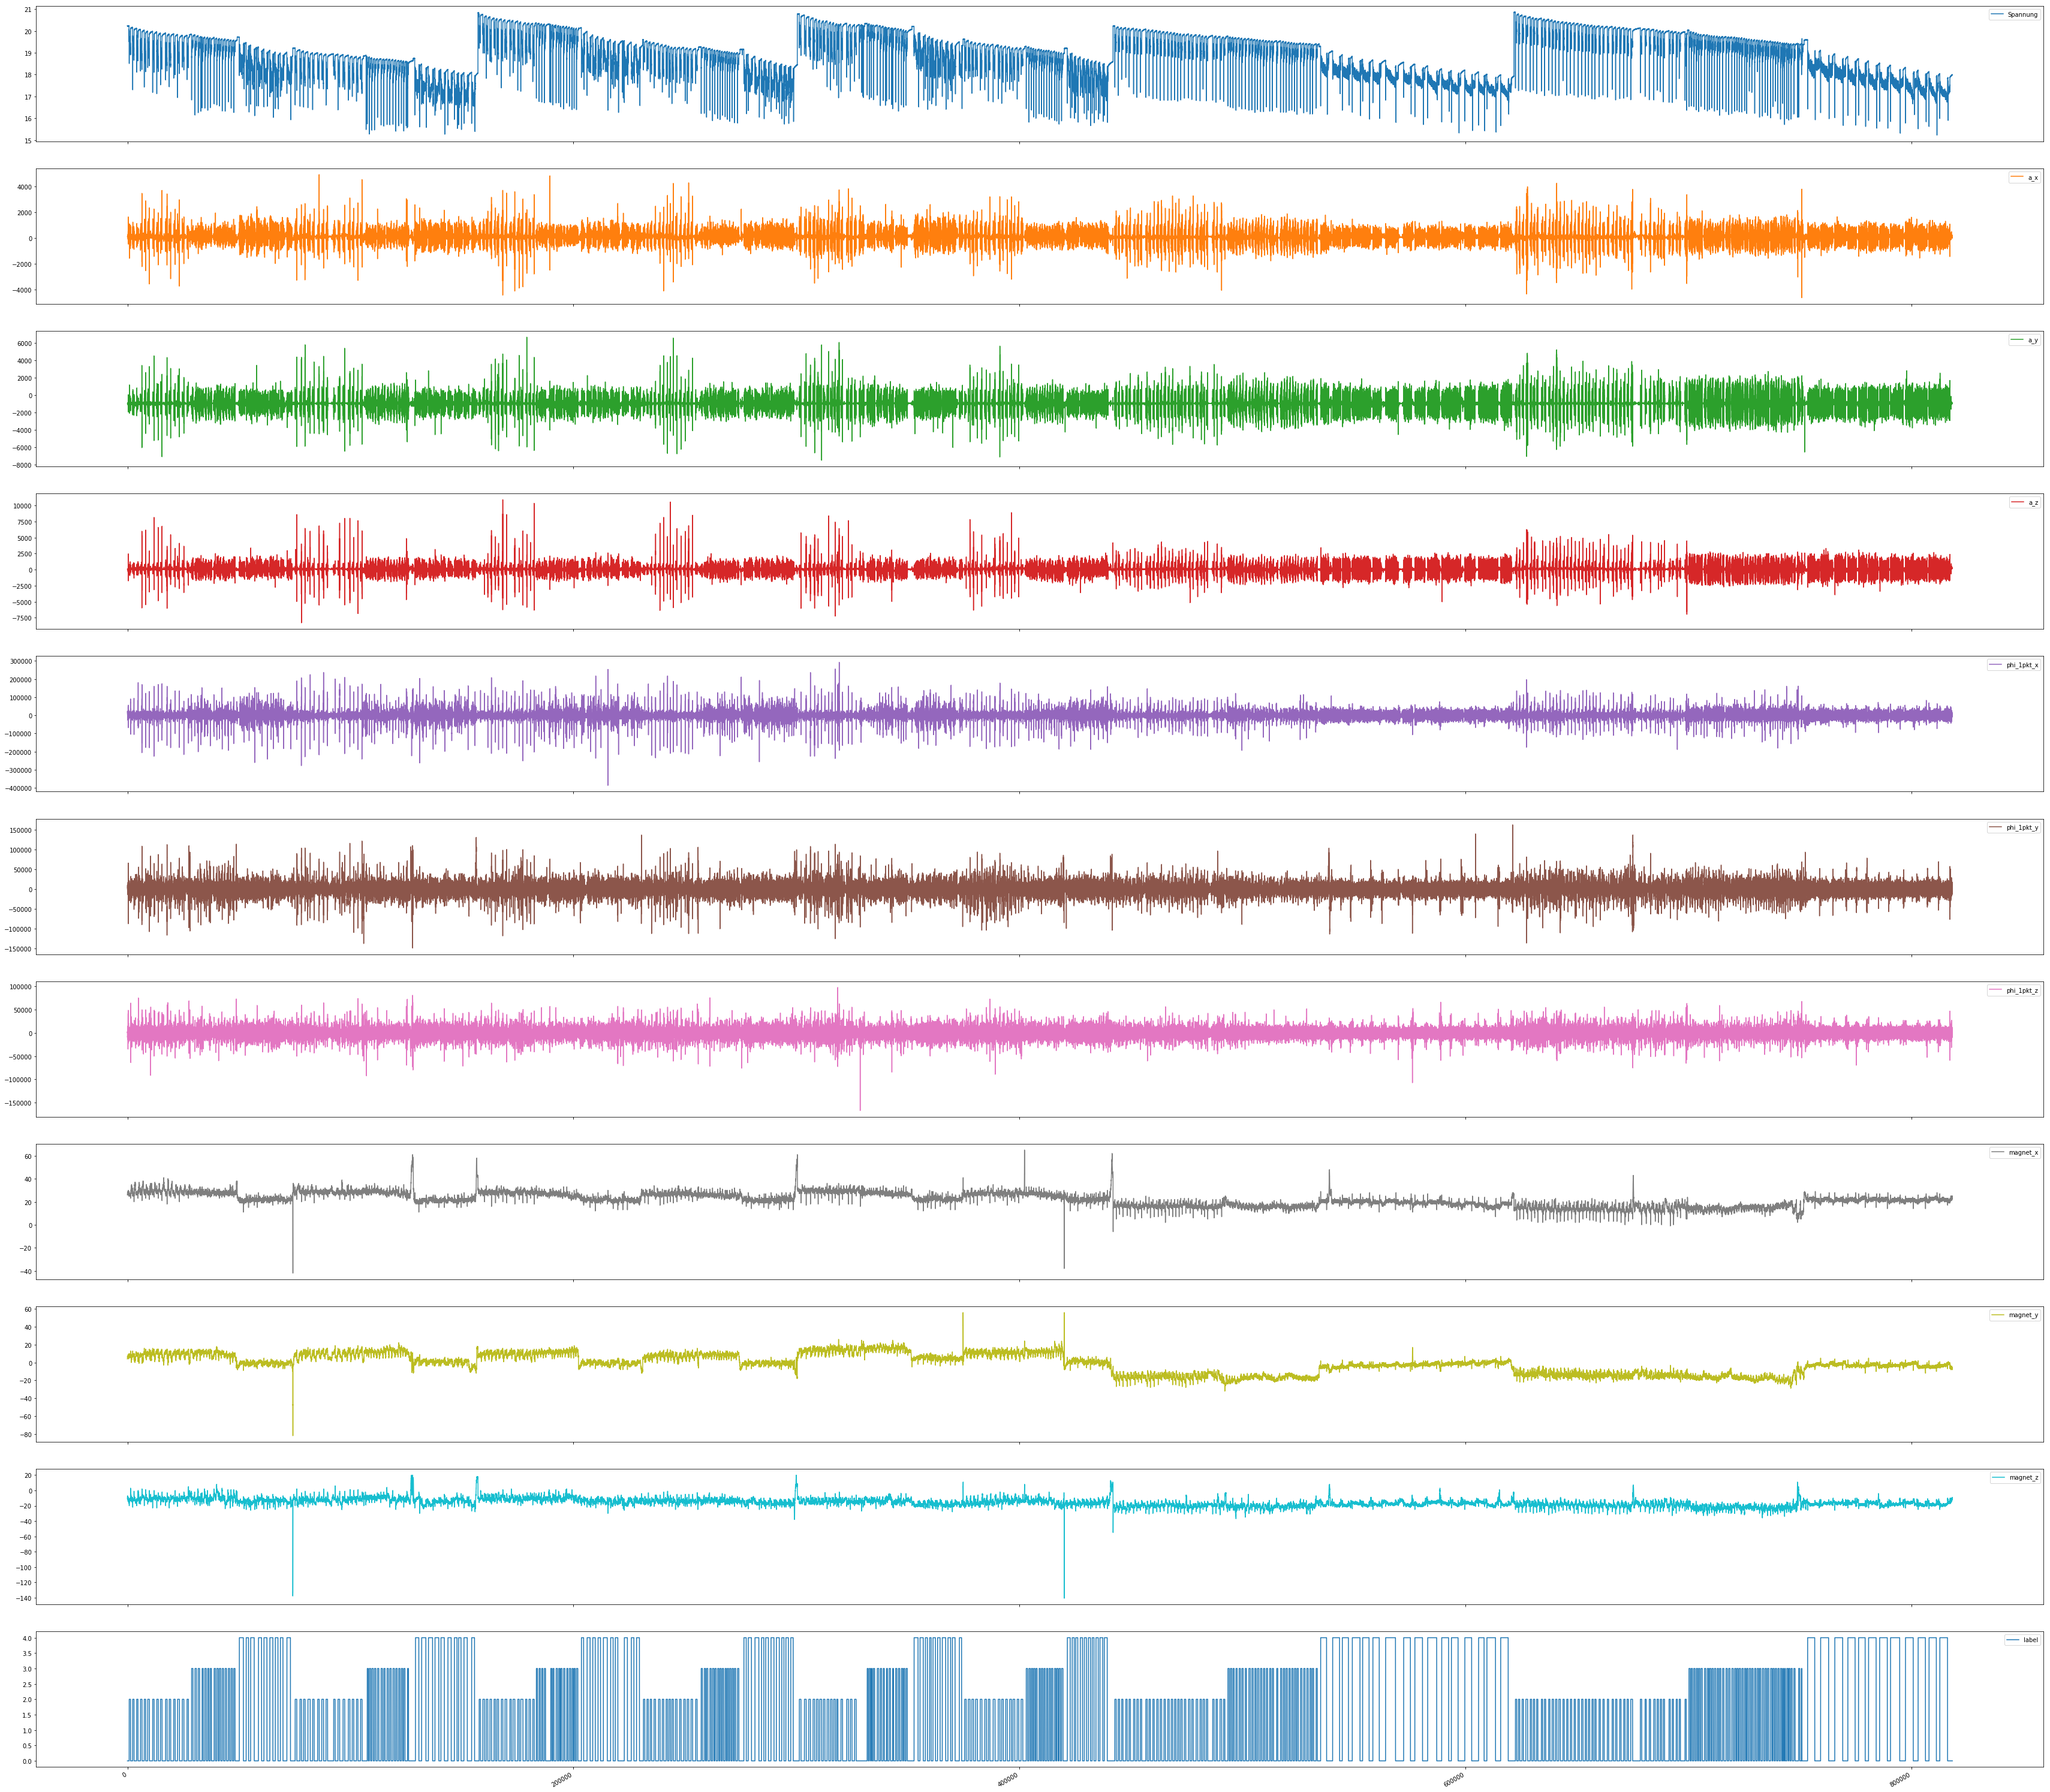

In [5]:
df_label.plot(subplots=True,figsize=(60, 60))

In [6]:
def abschnitt_number(data,seg_data_anzahl):
    row=data.shape[0]
    return int(row/seg_data_anzahl)
def abschnitt(data,i,seg_data_anzahl):
    row=data.shape[0]
    segment=data.loc[data.index[i]*seg_data_anzahl:data.index[i]*seg_data_anzahl+seg_data_anzahl-1]
    return segment


In [7]:
#def seg_number(seg_data_anzahl):
    #row=df.shape[0]
    #return int(row/seg_data_anzahl)

In [8]:
#def segment(i,seg_data_anzahl):
    #row=df.shape[0]
    #segment=df.loc[df.index[i]*seg_data_anzahl:df.index[i]*seg_data_anzahl+seg_data_anzahl-1]
    #return segment

In [9]:
seg_data_anzahl=200
seg_anzahl=abschnitt_number(df,seg_data_anzahl)
seg_anzahl



4092

In [10]:
label_segment=[abschnitt(label,i,seg_data_anzahl) for i in range(seg_anzahl)]

In [11]:
Segment=[abschnitt(df,i,seg_data_anzahl)  for i in range(seg_anzahl)]

In [12]:
label_für_segment=[np.array(label_segment[i].mode().max()) for i in range(seg_anzahl)]
klasse=[]
for Labels in label_für_segment:
    klasse.extend(Labels)

y=pd.DataFrame(klasse)
y.columns=['label']
y

,label
0,0
1,0
2,0
3,0
4,2
5,2
6,2
7,0
8,0
9,0


In [13]:
len(Segment)


4092

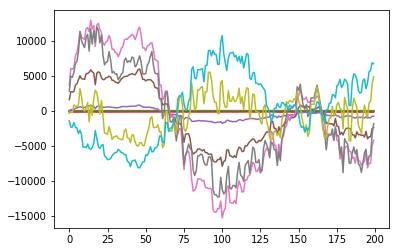

In [14]:
b,a=signal.butter(5,0.5,btype='lowpass')
c=signal.lfilter(b,a,Segment[0])
plt.plot(c)

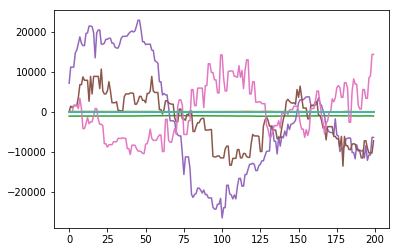

In [15]:
plt.plot(Segment[0])

In [16]:
def feature_extraction(data):
    def insegment(i,j,inseg_data_anzahl):
        insegment=data[i].loc[data[i].index[0]+j*inseg_data_anzahl:data[i].index[0]+j*inseg_data_anzahl+inseg_data_anzahl-1]
        return insegment
    Insegment=[insegment(i,j,10)
           for i in range(len(data))
           for j in range(10)]

    def mean_trend(i):
        trend=(insegment(i,0,10).mean()-insegment(i,0+1,10).mean()).abs()
        for j in range(1,9):
            trend=trend+(insegment(i,j,10).mean()-insegment(i,j+1,10).mean()).abs()
        return trend   

    Mean_trend=[mean_trend(i)
            for i in range(len(data))   
               ]



    def windows_mean_difference(i):
        wmd=(data[i].mean()-insegment(i,0,10).mean()).abs()
        for j in range(1,10):
            wmd=wmd+(data[i].mean()-insegment(i,j,10).mean()).abs()
        return wmd
    

    Windows_mean_difference=[windows_mean_difference(i)
       for i in range(len(data))                     
    ]

    def variance_trend(i):
        trend=((insegment(i,0,10).var())**2-(insegment(i,0+1,10).var())**2).abs()
        for j in range(1,9):
            trend=trend+((insegment(i,j,10).var())**2-(insegment(i,j+1,10).var())**2).abs()
        return trend 
    Variance_trend=[variance_trend(i)
                for i in range(len(data))   
    ]

    def windows_variance_difference(i):
        wmd=((data[i].var())**2-(insegment(i,0,10).var())**2).abs()
        for j in range(1,10):
            wmd=wmd+((data[i].var())**2-(insegment(i,j,10).var())**2).abs()
        return wmd
    Windows_variance_difference=[windows_variance_difference(i)
       for i in range(len(data))                     
    ]

    def distanz_beschleunigung_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[1]])**2+(data[i][data[i].columns[2]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_x_y']
        return distanz
    Distanz_beschleunigung_x_y=[distanz_beschleunigung_x_y(i)
    for i in range(len(data))
                               ] 



    def distanz_beschleunigung_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[2]])**2+(data[i][data[i].columns[3]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_y_z']
        return distanz
    Distanz_beschleunigung_y_z=[distanz_beschleunigung_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_beschleunigung_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[1]])**2+(data[i][data[i].columns[3]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_x_z']
        return distanz
    Distanz_beschleunigung_x_z=[distanz_beschleunigung_x_z(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[4]])**2+(data[i][data[i].columns[5]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_x_y']
        return distanz
    Distanz_winkelgeschwindigkeit_x_y=[distanz_winkelgeschwindigkeit_x_y(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[4]])**2+(data[i][data[i].columns[6]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_x_z']
        return distanz
    Distanz_winkelgeschwindigkeit_x_z=[distanz_winkelgeschwindigkeit_x_z(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[5]])**2+(data[i][data[i].columns[6]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_y_z']
        return distanz
    Distanz_winkelgeschwindigkeit_y_z=[distanz_winkelgeschwindigkeit_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[7]])**2+(data[i][data[i].columns[8]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_x_y']
        return distanz
    Distanz_magnetfeld_x_y=[distanz_magnetfeld_x_y(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[8]])**2+(data[i][data[i].columns[9]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_y_z']
        return distanz
    Distanz_magnetfeld_y_z=[distanz_magnetfeld_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[7]])**2+(data[i][data[i].columns[9]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_x_z']
        return distanz
    Distanz_magnetfeld_x_z=[distanz_magnetfeld_x_z(i)
    for i in range(len(data))
                               ]  


    def dwt(i):
        ca,cd=pywt.dwt(data[i],'haar',axis=0)
        ca=pd.DataFrame(ca)
        cd=pd.DataFrame(cd)
        cd.columns=sensor_list
        ca.columns=sensor_list
        return [ca,cd]
      #Aus der arbeit wird erste Koeffizient cA ausgewählt 

    dwt_lowpass_absolut_mean=[dwt(i)[0].abs().mean()
                             for i in range(len(data))    
    ]

    dwt_highpass_absolut_mean=[dwt(i)[1].abs().mean()
                             for i in range(len(data))    
    ]

    def dwt_lowpass_average_power(i):
        Energy=((dwt(i)[0].abs())**2).sum()/len(dwt(i)[0])  #bei mir ist 5% einer Energie
        Energy.index=sensor_list
        return Energy
    Dwt_lowpass_average_power=[dwt_lowpass_average_power(i)
                               for i in range(len(data))   
    ]

    def dwt_highpass_average_power(i):
        Energy=((dwt(i)[1].abs())**2).sum()/len(dwt(i)[1])  #bei mir ist 5% einer Energie
        Energy.index=sensor_list
        return Energy
    Dwt_highpass_average_power=[dwt_highpass_average_power(i)
                               for i in range(len(data))   
    ]

    dwt_lowpass_std=[dwt(i)[0].std()
                             for i in range(len(data))    
    ]

    dwt_highpass_std=[dwt(i)[1].std()
                             for i in range(len(data))    
    ]

    def energy_ca(i):
        energy=(dwt(i)[0].abs()**2).sum()
        return energy
    Energy_ca=[energy_ca(i)
        for i in range(len(data))
    ]

    def energy_cd(i):
        energy=(dwt(i)[1].abs()**2).sum()
        return energy
    Energy_cd=[energy_cd(i)
        for i in range(len(data))
    ]

    def sum_ca(i):
        summe=(dwt(i)[0]).sum()
        return summe

    Sum_ca=[sum_ca(i)
           for i in range(len(data))
           ]


    def sum_cd(i):
        summe=dwt(i)[1].sum()
        return summe
    Sum_cd=[sum_cd(i)
        for i in range(len(data))
    ]

    mean=[data[i].mean()
         for i in range(len(data))
         ]

    std=[data[i].std()
         for i in range(len(data))
        ]


    Max=[data[i].max()
         for i in range(len(data))
        ]


    Min=[data[i].min()
         for i in range(len(data))
        ]


    median=[data[i].median()
         for i in range(len(data))
        ]

    quartiles=[data[i].quantile()
         for i in range(len(data))
        ]

    
    
    energy_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in sensor_list:
            energy_frequency.append('Energy_'+sensor+freqenz)



    def energy(i):
        energy=[]
        ft=pd.DataFrame(abs(np.fft.fftn(data[i])))[0:50]
        for j in range(5):
            Energy=((ft.loc[10*j:(10*(j+1)-1)]**2).sum()).tolist() #bei mir ist 5% einer Energie
            energy.extend(Energy)
        energy=pd.DataFrame(energy).T
        energy.columns=energy_frequency
        return energy


    Energy=[energy(i)
         for i in range(len(data))
        ]
    
    
    
    
    
    fft_sum_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in sensor_list:
            fft_sum_frequency.append('fft_sum_'+sensor+freqenz)


    def fft_sum(i):
        summe=[]
        ft=pd.DataFrame(abs(np.fft.fftn(data[i])))[0:50]
        for j in range(5):
            fft_sum=((ft.loc[10*j:(10*(j+1)-1)]).sum()).tolist()
            summe.extend(fft_sum)
        summe=pd.DataFrame(summe).T   
        summe.columns=fft_sum_frequency
        return summe

    Fft_sum=[fft_sum(i)
              for i in range(len(data))  
    ]
 

    dc_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in sensor_list:
            dc_frequency.append('DC_Komponent_'+sensor+freqenz)


    def fft_DC_komponent(i):
        DC=[]
        ft=pd.DataFrame(np.fft.fftn(data[i]).real)[0:50]
        for j in range(5):
            dc=(((ft.loc[10*j:(10*(j+1)-1)]**2).sum())/len(data)).tolist()
            DC.extend(dc)
        DC=pd.DataFrame(DC).T
        DC.columns=dc_frequency 
        return DC

    Fft_DC_komponent=[fft_DC_komponent(i)
              for i in range(len(data))  
    ]
    
    
    
    variance=[data[i].var()
              for i in range(len(data))   
    ]


    def entropy(i):
        entropy=[]
        for j in range(10) :
            p=data[i][data[i].columns[j]].value_counts()/len(data[i])
            e=sc.stats.entropy(p)
            entropy.append(e)
        entropy=np.array(entropy)
        entropy=pd.DataFrame(entropy)
        entropy.index=sensor_list
        return entropy


    Entropy=[entropy(i)
        for i in range(len(data))
    ]


    def entropy_fft(i):
        entropy=[]
        ft=abs(np.fft.fftn(data[i]))
        for j in range(10):
            p=pd.DataFrame(ft)[j].value_counts()/len(ft)
            e=sc.stats.entropy(p)
            entropy.append(e)
        entropy=np.array(entropy)
        entropy=pd.DataFrame(entropy)
        entropy.index=sensor_list
        return entropy



    Entropy_fft=[entropy_fft(i)
                 for i in range(len(data))  
    ]

    def fft_max_magnitude_freq(i):
        ft=abs(np.fft.fftn(data[i])).tolist()
        freq=np.fft.fftfreq(len(data[1])).tolist()
        frequenz=[]
        for j in range(10):
            ft_max=np.max(ft[j])
            index=ft[j].index(ft_max)
            frequency=freq[index]
            frequenz.append(frequency)
        frequenz=np.array(frequenz)
        frequenz=pd.DataFrame(frequenz)
        frequenz.index=sensor_list
        return frequenz    
    Fft_max_magnitude_freq=[fft_max_magnitude_freq(i)
                            for i in range(len(data))
    ]     

    skewness=[data[i].skew()
             for i in range(len(data))      
             ]     #Schiefe
    skewness[1]

    kurtosis=[data[i].kurtosis()
              for i in range(len(data))

    ]   #Spizigkeit


    root_mean_square=[np.sqrt((data[i]**2).mean())                  
        for i in range(len(data))
    ] #quadratisches Mettel


    def mean_gradient(i):
        grad=[]
        for j in range(10):
            a=np.gradient(data[i][data[i].columns[j]]).mean()
            grad.append(a)
        grad=np.array(grad)
        grad=pd.DataFrame(grad)
        grad.index=sensor_list
        return grad

    Mean_gradient=[mean_gradient(i)
                   for i in range(len(data))

    ]

    def abs_gradient(i):
        grad=[]
        for j in range(10):
            a=abs(np.gradient(data[i][data[i].columns[j]])).max()
            grad.append(a)
        grad=np.array(grad)
        grad=pd.DataFrame(grad)
        grad.index=sensor_list
        return grad

    Abs_gradient=[abs_gradient(i)
                  for i in range(len(data))

    ]

    def IQr(i):
        a=iqr(data[i],axis=0)
        a=pd.DataFrame(a)
        a.index=sensor_list
        return a

    IQR=[IQr(i)
         for i in range(len(data))
        ]

    MAD=[data[i].mad()
         for i in range(len(data))
        ]


    def number_of_zero_crossing(i):
        number=[]
        for j in range(10):
            num=float(((np.array(data[i][data[i].columns[j]].loc[data[i].index[:-1]])*np.array(data[i][data[i].columns[j]].loc[data[i].index[1:]]))<0).sum())
            number.append(num)
        number=np.array(number)
        number=pd.DataFrame(number)
        number.index=sensor_list
        return number




    Number_of_zero_crossing=[number_of_zero_crossing(i)
                             for i in range(len(data))
    ]



    def correlation_Beschleunigung_x_y(i):
        corr=np.correlate(data[i][data[i].columns[1]],data[i][data[i].columns[2]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_x_y']
        return corr

    Correlation_Beschleunigung_x_y=[correlation_Beschleunigung_x_y(i)
                                    for i in range(len(data))    
    ]

    def correlation_Beschleunigung_x_z(i):
        corr=np.correlate(data[i][data[i].columns[1]],data[i][data[i].columns[3]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_x_z']
        return corr
    Correlation_Beschleunigung_x_z=[correlation_Beschleunigung_x_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Beschleunigung_y_z(i):
        corr=np.correlate(data[i][data[i].columns[2]],data[i][data[i].columns[3]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_y_z']
        return corr

    Correlation_Beschleunigung_y_z=[correlation_Beschleunigung_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Windelgeschwindigkeit_x_y(i):
        corr=np.correlate(data[i][data[i].columns[4]],data[i][data[i].columns[5]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_x_y']
        return corr

    Correlation_Windelgeschwindigkeit_x_y=[correlation_Windelgeschwindigkeit_x_y(i)
                                    for i in range(len(data))    
    ]

    Segment[1].columns[9]

    def correlation_Windelgeschwindigkeit_x_z(i):
        corr=np.correlate(data[i][data[i].columns[4]],data[i][data[i].columns[6]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_x_z']
        return corr

    Correlation_Windelgeschwindigkeit_x_z=[correlation_Windelgeschwindigkeit_x_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Windelgeschwindigkeit_y_z(i):
        corr=np.correlate(data[i][data[i].columns[5]],data[i][data[i].columns[6]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_y_z']
        return corr

    Correlation_Windelgeschwindigkeit_y_z=[correlation_Windelgeschwindigkeit_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_x_y(i):
        corr=np.correlate(data[i][data[i].columns[7]],data[i][data[i].columns[8]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_x_y']
        return corr

    Correlation_Magnetfeld_x_y=[correlation_Magnetfeld_x_y(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_y_z(i):
        corr=np.correlate(data[i][data[i].columns[8]],data[i][data[i].columns[9]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_y_z']
        return corr

    Correlation_Magnetfeld_y_z=[correlation_Magnetfeld_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_x_z(i):
        corr=np.correlate(data[i][data[i].columns[7]],data[i][data[i].columns[9]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_x_z']
        return corr

    Correlation_Magnetfeld_x_z=[correlation_Magnetfeld_x_z(i)
                                    for i in range(len(data))    
    ]

    def ar_model_co(i):
        Ar_coe=[]
        for j in range(10):
            A=AR(data[i][data[i].columns[j]].values)
            Aa=A.fit(maxlag=3) #oder 3 aus der Arbeit"ACTIVITY RECOGNITION FROM ACCELERATION DATA USING AR MODEL REPRESENTATION AND SVM"
            ar_coe=Aa.params
            Ar_coe.append(ar_coe)
        Ar_coe=np.array(Ar_coe)
        Ar_coe=pd.DataFrame(Ar_coe)
        Ar_coe.index=sensor_list

        return Ar_coe




    ar_model_co(1)

    Ar_model_co=[ar_model_co(i)
                 for i in range(len(data))
    ]

    def covariance_Beschleunigung_x_y(i):
        cov=[data[i][data[i].columns[1]].cov(data[i][data[i].columns[2]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_x_y']
        return cov

    Covariance_Beschleunigung_x_y=[covariance_Beschleunigung_x_y(i)
                                    for i in range(len(data))    
    ]

    covariance_Beschleunigung_x_y(2)

    def covariance_Beschleunigung_x_z(i):
        cov=[data[i][data[i].columns[1]].cov(data[i][data[i].columns[3]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_x_z']
        return cov

    Covariance_Beschleunigung_x_z=[covariance_Beschleunigung_x_z(i)
                                    for i in range(len(data))    
    ]
    Covariance_Beschleunigung_x_z[1]

    def covariance_Beschleunigung_y_z(i):
        cov=[data[i][data[i].columns[2]].cov(data[i][data[i].columns[3]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_y_z']
        return cov

    Covariance_Beschleunigung_y_z=[covariance_Beschleunigung_y_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_x_y(i):
        cov=[data[i][data[i].columns[4]].cov(data[i][data[i].columns[5]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_x_y']
        return cov

    Covariance_Winkelgeschwindigkeit_x_y=[covariance_Winkelgeschwindigkeit_x_y(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_y_z(i):
        cov=[data[i][data[i].columns[5]].cov(data[i][data[i].columns[6]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_y_z']
        return cov

    Covariance_Winkelgeschwindigkeit_y_z=[covariance_Winkelgeschwindigkeit_y_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_x_z(i):
        cov=[data[i][data[i].columns[4]].cov(data[i][data[i].columns[6]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_x_z']
        return cov

    Covariance_Winkelgeschwindigkeit_x_z=[covariance_Winkelgeschwindigkeit_x_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_x_y(i):
        cov=[data[i][data[i].columns[7]].cov(data[i][data[i].columns[8]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_x_y']
        return cov

    Covariance_Magnetfeld_x_y=[covariance_Magnetfeld_x_y(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_x_z(i):
        cov=[data[i][data[i].columns[7]].cov(data[i][data[i].columns[9]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_x_z']
        return cov

    Covariance_Magnetfeld_x_z=[covariance_Magnetfeld_x_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_y_z(i):
        cov=[data[i][data[i].columns[8]].cov(data[i][data[i].columns[9]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_y_z']
        return cov

    Covariance_Magnetfeld_y_z=[covariance_Magnetfeld_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_mean_variance(i):
        cor=[mean[i].corr(variance[i])]
        cor=pd.DataFrame(cor)
        cor.columns=['correlation_mean_variance']
        return cor
    Correlation_mean_variance=[correlation_mean_variance(i)
                               for i in range(len(data))  
    ]
    
    def SMA_a_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        a_xyz=fft[1]+fft[2]+fft[3]
        for j in range(10):
            sma=a_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_a_0-10HZ','SMA_a_10-20HZ','SMA_a_20-30HZ','SMA_a_30-40HZ','SMA_a_40-50HZ','SMA_a_50-60HZ','SMA_a_60-70HZ','SMA_a_70-80HZ','SMA_a_80-90HZ','SMA_a_90-100HZ']
        return SMA
    sma_a=[SMA_a_x_y_z(i) for i in range(len(data))]
    #sma_a=pd.concat(sma_a,axis=0)
    #sma_a.index=[i for i in range(len(data))]
 
    def SMA_W_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        W_xyz=fft[4]+fft[5]+fft[6]
        for j in range(10):
            sma=W_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_W_0-10HZ','SMA_W_10-20HZ','SMA_W_20-30HZ','SMA_W_30-40HZ','SMA_W_40-50HZ','SMA_W_50-60HZ','SMA_W_60-70HZ','SMA_W_70-80HZ','SMA_W_80-90HZ','SMA_W_90-100HZ']
        return SMA

    sma_w=[SMA_W_x_y_z(i) for i in range(len(data))]
    #sma_w=pd.concat(sma_w,axis=0)
    #sma_w.index=[i for i in range(len(data))]
    #preprocessing.normalize(sma1)
    
    def SMA_M_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        M_xyz=fft[7]+fft[8]+fft[9]
        for j in range(10):
            sma=M_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_M_0-10HZ','SMA_M_10-20HZ','SMA_M_20-30HZ','SMA_M_30-40HZ','SMA_M_40-50HZ','SMA_M_50-60HZ','SMA_M_60-70HZ','SMA_M_70-80HZ','SMA_M_80-90HZ','SMA_M_90-100HZ']
        return SMA
 
    sma_m=[SMA_M_x_y_z(i) for i in range(len(data))]
    
    
    def SMA_V_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        V_xyz=fft[0]
        for j in range(10):
            sma=V_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_V_0-10HZ','SMA_V_10-20HZ','SMA_V_20-30HZ','SMA_V_30-40HZ','SMA_V_40-50HZ','SMA_V_50-60HZ','SMA_V_60-70HZ','SMA_V_70-80HZ','SMA_V_80-90HZ','SMA_V_90-100HZ']
        return SMA
 
    sma_v=[SMA_V_x_y_z(i) for i in range(len(data))]


    def feature_list_inseg(i):
        feature_list_seg=pd.concat([Mean_trend[i],Windows_mean_difference[i],Variance_trend[i],Windows_variance_difference[i],dwt_lowpass_absolut_mean[i],dwt_highpass_absolut_mean[i],Dwt_lowpass_average_power[i],Dwt_highpass_average_power[i],dwt_lowpass_std[i],dwt_highpass_std[i],Energy_ca[i],Energy_cd[i],Sum_ca[i],Sum_cd[i],mean[i],std[i],Max[i],Min[i],median[i],quartiles[i],variance[i],Entropy[i],Entropy_fft[i],Fft_max_magnitude_freq[i],skewness[i],kurtosis[i],root_mean_square[i],Mean_gradient[i],Abs_gradient[i],IQR[i],MAD[i],Number_of_zero_crossing[i],Ar_model_co[i]],axis=1)                                                                          
        feature_list_seg.columns=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4']
        return feature_list_seg


    Features_list1=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4']
    #Features_list2=['Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance']
    #Features_list=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','Energy','Fft_sum','Fft_DC_komponent','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4','Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance']


    #features_name=[]
    #for sensorname in sensor_list:
       #for feature in Features_list:
            #features_name.append(sensorname+'_'+feature)   


    features_name1=[]
    for sensorname in sensor_list:
        for feature in Features_list1:
            features_name1.append(sensorname+'_'+feature)   
    

    def feature_inseg(i):
        features=[]
        for j in range(10):
            f=feature_list_inseg(i).loc[data[i].columns[j]].tolist()
            features.extend(f)   
        features=np.array(features)
        features=pd.DataFrame(features).T
        features.columns=features_name1
        return features
    



    def feature_zwischen_seg(i):
        feature_list_seg=pd.concat([Distanz_beschleunigung_x_y[i],Distanz_beschleunigung_x_z[i],Distanz_beschleunigung_y_z[i],Distanz_magnetfeld_x_y[i],Distanz_magnetfeld_y_z[i],Distanz_magnetfeld_x_z[i],Distanz_winkelgeschwindigkeit_x_y[i],Distanz_winkelgeschwindigkeit_x_z[i],Distanz_winkelgeschwindigkeit_y_z[i],Correlation_Beschleunigung_x_y[i],Correlation_Beschleunigung_x_z[i],Correlation_Beschleunigung_y_z[i],Correlation_Magnetfeld_x_y[i],Correlation_Magnetfeld_x_z[i],Correlation_Magnetfeld_y_z[i],Correlation_Windelgeschwindigkeit_x_y[i],Correlation_Windelgeschwindigkeit_x_z[i],Correlation_Windelgeschwindigkeit_y_z[i],Covariance_Beschleunigung_x_y[i],Covariance_Beschleunigung_x_z[i],Covariance_Beschleunigung_y_z[i],Covariance_Magnetfeld_x_y[i],Covariance_Magnetfeld_x_z[i],Covariance_Magnetfeld_y_z[i],Covariance_Winkelgeschwindigkeit_x_y[i],Covariance_Winkelgeschwindigkeit_x_z[i],Covariance_Winkelgeschwindigkeit_y_z[i],Correlation_mean_variance[i],sma_a[i],sma_w[i],sma_m[i],sma_v[i],Energy[i],Fft_DC_komponent[i],Fft_sum[i]],axis=1)
        feature_list_seg.columns=['Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance','SMA_a_0-10HZ','SMA_a_10-20HZ','SMA_a_20-30HZ','SMA_a_30-40HZ','SMA_a_40-50HZ','SMA_a_50-60HZ','SMA_a_60-70HZ','SMA_a_70-80HZ','SMA_a_80-90HZ','SMA_a_90-100HZ','SMA_W_0-10HZ','SMA_W_10-20HZ','SMA_W_20-30HZ','SMA_W_30-40HZ','SMA_W_40-50HZ','SMA_W_50-60HZ','SMA_W_60-70HZ','SMA_W_70-80HZ','SMA_W_80-90HZ','SMA_W_90-100HZ','SMA_M_0-10HZ','SMA_M_10-20HZ','SMA_M_20-30HZ','SMA_M_30-40HZ','SMA_M_40-50HZ','SMA_M_50-60HZ','SMA_M_60-70HZ','SMA_M_70-80HZ','SMA_M_80-90HZ','SMA_M_90-100HZ','SMA_V_0-10HZ','SMA_V_10-20HZ','SMA_V_20-30HZ','SMA_V_30-40HZ','SMA_V_40-50HZ','SMA_V_50-60HZ','SMA_V_60-70HZ','SMA_V_70-80HZ','SMA_V_80-90HZ','SMA_V_90-100HZ']+energy_frequency+dc_frequency+fft_sum_frequency
        return feature_list_seg
   






    def feature_seg(i):
        feature=pd.concat([feature_inseg(i),feature_zwischen_seg(i)],axis=1)
        return feature


    feature_seg(1)

    feature=[feature_seg(i)
             for i in range(len(data))    
    ]
    features=pd.concat(feature,axis=0)
    features.index=[i for i in range(len(data))]
    return features


In [17]:
x_extraktion=feature_extraction(Segment)


In [18]:
x_extraktion

,Spannung_Mean_trend,Spannung_Windows_mean_difference,Spannung_Variance_trend,Spannung_Windows_variance_difference,Spannung_dwt_lowpass_absolut_mean,Spannung_dwt_highpass_absolut_mean,Spannung_Dwt_lowpass_average_power,Spannung_Dwt_highpass_average_power,Spannung_dwt_lowpass_std,Spannung_dwt_highpass_std,...,fft_sum_Spannung_80-100HZ,fft_sum_a_x_80-100HZ,fft_sum_a_y_80-100HZ,fft_sum_a_z_80-100HZ,fft_sum_phi_1pkt_x_80-100HZ,fft_sum_phi_1pkt_y_80-100HZ,fft_sum_phi_1pkt_z_80-100HZ,fft_sum_magnet_x_80-100HZ,fft_sum_magnet_y_80-100HZ,fft_sum_magnet_z_80-100HZ
0,0.036574,0.027875,2.383633e-08,1.841791e-08,28.606773,0.002656,818.347541,0.000022,0.008408,0.004762,...,4.374616e+05,4.069027e+05,4.180001e+05,4.281436e+05,4.052542e+05,3.595284e+05,3.745214e+05,3.862335e+05,4.757182e+05,4.794076e+05
1,0.033608,0.026195,1.121391e-08,1.561166e-08,28.606144,0.003006,818.311548,0.000026,0.008275,0.005114,...,6.678254e+05,7.125054e+05,8.363776e+05,8.529154e+05,8.026902e+05,6.932956e+05,6.401010e+05,6.966612e+05,7.112886e+05,6.835732e+05
2,0.027678,0.029753,1.051142e-08,1.711815e-08,28.608101,0.002167,818.423522,0.000018,0.008268,0.004268,...,1.370522e+06,1.512485e+06,1.553272e+06,1.354308e+06,1.065240e+06,7.657909e+05,7.528504e+05,8.592568e+05,9.236215e+05,1.125196e+06
3,0.033608,1.098206,2.310437e-08,8.152780e-03,28.444753,0.008388,809.160376,0.000438,0.238647,0.020998,...,5.276198e+05,5.677591e+05,6.404330e+05,6.799674e+05,6.453359e+05,5.320826e+05,4.962270e+05,5.559207e+05,5.673451e+05,5.636759e+05
4,2.543370,2.274897,1.651864e-02,5.268832e-02,27.561962,0.024184,759.801022,0.002206,0.375073,0.047208,...,1.203379e+06,1.016828e+06,6.484997e+05,4.109260e+05,6.109958e+05,8.189227e+05,8.999201e+05,8.458770e+05,9.186640e+05,1.131686e+06
5,0.363762,0.461622,5.372933e-05,1.681606e-04,27.486753,0.022786,755.529371,0.001333,0.088499,0.036689,...,5.997445e+05,6.332345e+05,8.298275e+05,9.733887e+05,9.627379e+05,7.967717e+05,6.514810e+05,7.099670e+05,8.039981e+05,7.399949e+05
6,0.358820,0.520931,2.995501e-04,5.845666e-02,27.322148,0.025792,746.650405,0.001902,0.390106,0.043460,...,9.569289e+05,1.079662e+06,1.254400e+06,1.198952e+06,1.051859e+06,9.643136e+05,9.361725e+05,1.054574e+06,1.093871e+06,9.379733e+05
7,0.023724,0.108733,8.095136e-09,3.203384e-07,28.441119,0.002376,808.897579,0.000018,0.018637,0.004213,...,1.254126e+06,1.112400e+06,9.629865e+05,8.337097e+05,7.907292e+05,7.237409e+05,7.344186e+05,9.576596e+05,1.202933e+06,1.317831e+06
8,0.022735,0.018781,2.205300e-09,5.623388e-09,28.470196,0.002237,810.552090,0.000016,0.007164,0.003971,...,7.220077e+05,6.364083e+05,5.657538e+05,4.845092e+05,4.605968e+05,4.094263e+05,4.192072e+05,5.476048e+05,6.452807e+05,7.403932e+05
9,0.028666,0.031631,1.828713e-08,2.242775e-08,28.485922,0.002167,811.447853,0.000019,0.009126,0.004382,...,6.030294e+05,5.557221e+05,4.801628e+05,5.031937e+05,4.685797e+05,4.541279e+05,4.503787e+05,4.114415e+05,4.997038e+05,5.757020e+05


In [19]:
def shuffle(data):
    Shuffle=np.arange(578)
    np.random.shuffle(Shuffle)
    X=data[data.columns[Shuffle]]
    return X
X=shuffle(x_extraktion)
shuffle_features_name=X.columns.tolist()
X


,a_y_Entropy,magnet_z_dwt_lowpass_std,a_z_IQR,fft_sum_phi_1pkt_x_20-40HZ,Covariance_Magnetfeld_y_z,phi_1pkt_y_quartiles,phi_1pkt_z_MAD,a_z_std,fft_sum_Spannung_80-100HZ,magnet_y_Ar3,...,a_x_dwt_lowpass_absolut_mean,a_y_std,a_y_Ar1,Correlation_Beschleunigung_x_y,a_y_dwt_lowpass_std,fft_sum_phi_1pkt_y_80-100HZ,fft_sum_phi_1pkt_z_40-60HZ,phi_1pkt_z_Mean_gradient,Correlation_Magnetfeld_x_y,phi_1pkt_z_Ar3
0,3.875369,1.790477,44.00,7.446976e+05,0.269472,-1586.0,5266.62790,26.720943,4.374616e+05,1.110223e-16,...,161.453691,32.706981,-40.806790,-22456276,46.069072,3.595284e+05,6.178042e+05,71.7150,33467,-0.272262
1,4.252524,1.706716,99.50,3.184188e+06,-0.289447,-1586.0,15632.87290,103.385197,6.678254e+05,-1.998401e-15,...,185.573104,78.572393,-123.193533,-20983379,107.955568,6.932956e+05,1.426194e+06,133.3600,35415,0.138219
2,4.232913,1.911303,77.50,3.409134e+06,0.231633,2075.0,8395.50350,268.375477,1.370522e+06,-8.437695e-15,...,178.275762,154.994989,-396.300629,-24521574,162.579254,7.657909e+05,2.681315e+06,-273.4275,35819,0.125177
3,4.293421,1.682035,66.00,1.747124e+06,-0.274698,244.0,4845.93550,95.002845,5.276198e+05,-2.220446e-16,...,190.749125,112.734361,-397.992266,-25569321,145.482016,5.320826e+05,9.152406e+05,101.0075,39078,-0.255914
4,4.689565,2.334837,443.50,1.194676e+06,-0.943367,-366.0,5279.09500,365.822343,1.203379e+06,0.000000e+00,...,402.195266,644.789673,-156.299837,-44036684,850.622145,8.189227e+05,9.505934e+05,-35.0875,37227,-0.151771
5,4.612748,1.258727,518.00,1.257802e+06,-0.078668,0.0,4044.10800,335.121555,5.997445e+05,1.998401e-15,...,375.608051,430.934862,-108.854934,-38979449,595.486099,7.967717e+05,1.124042e+06,5.1875,38589,0.291920
6,4.618070,3.634848,562.00,2.802877e+06,0.365327,3295.0,3436.17080,377.074843,9.569289e+05,-1.665335e-16,...,357.343483,318.202646,-851.361856,-37716857,394.534009,9.643136e+05,1.976616e+06,-32.6600,44469,-0.216759
7,4.446572,4.983184,317.50,2.873779e+06,5.600201,-1586.0,15157.93885,215.916207,1.254126e+06,-4.440892e-16,...,264.245804,138.620430,-60.760805,-31372882,193.122616,7.237409e+05,1.486480e+06,89.1150,48224,0.112947
8,4.107119,2.736362,47.50,8.768566e+05,3.627739,-12573.0,10031.94430,38.676268,7.220077e+05,-8.881784e-16,...,110.923841,50.484586,-5.792115,-13445193,71.525477,4.094263e+05,5.977207e+05,-13.4300,25882,-0.151605
9,3.814489,1.434355,26.00,1.239613e+06,1.161307,-366.0,6418.14520,35.087543,6.030294e+05,-5.551115e-16,...,76.275608,45.871538,-130.156193,-8293238,62.832059,4.541279e+05,1.067826e+06,112.6050,31449,0.207555


In [20]:
x=preprocessing.MaxAbsScaler().fit_transform(X)
x=pd.DataFrame(x)
x.columns=shuffle_features_name
x

,a_y_Entropy,magnet_z_dwt_lowpass_std,a_z_IQR,fft_sum_phi_1pkt_x_20-40HZ,Covariance_Magnetfeld_y_z,phi_1pkt_y_quartiles,phi_1pkt_z_MAD,a_z_std,fft_sum_Spannung_80-100HZ,magnet_y_Ar3,...,a_x_dwt_lowpass_absolut_mean,a_y_std,a_y_Ar1,Correlation_Beschleunigung_x_y,a_y_dwt_lowpass_std,fft_sum_phi_1pkt_y_80-100HZ,fft_sum_phi_1pkt_z_40-60HZ,phi_1pkt_z_Mean_gradient,Correlation_Magnetfeld_x_y,phi_1pkt_z_Ar3
0,0.777596,0.025544,0.014512,0.082310,0.000279,-0.017847,0.125594,0.012138,0.042424,7.154771e-16,...,0.106863,0.013272,-0.019417,-0.056902,0.015658,0.044750,0.058501,0.093144,0.193366,-0.332059
1,0.853272,0.024349,0.032817,0.351941,-0.000300,-0.017847,0.372799,0.046962,0.064764,-1.287859e-14,...,0.122827,0.031884,-0.058620,-0.053169,0.036693,0.086294,0.135049,0.173208,0.204621,0.168576
2,0.849337,0.027268,0.025561,0.376804,0.000240,0.023349,0.200209,0.121908,0.132909,-5.437626e-14,...,0.117997,0.062895,-0.188574,-0.062135,0.055259,0.095318,0.253898,-0.355128,0.206955,0.152669
3,0.861478,0.023997,0.021768,0.193106,-0.000284,0.002746,0.115562,0.043155,0.051167,-1.430954e-15,...,0.126253,0.045746,-0.189379,-0.064790,0.049448,0.066228,0.086666,0.131189,0.225785,-0.312120
4,0.940965,0.033310,0.146273,0.132045,-0.000976,-0.004119,0.125891,0.166173,0.116700,0.000000e+00,...,0.266204,0.261648,-0.074373,-0.111584,0.289118,0.101931,0.090013,-0.045572,0.215090,-0.185104
5,0.925551,0.017958,0.170844,0.139022,-0.000081,0.000000,0.096440,0.152227,0.058161,1.287859e-14,...,0.248606,0.174868,-0.051797,-0.098769,0.202400,0.099174,0.106437,0.006738,0.222960,0.356034
6,0.926619,0.051857,0.185356,0.309796,0.000378,0.037078,0.081943,0.171284,0.092800,-1.073216e-15,...,0.236518,0.129123,-0.405109,-0.095570,0.134098,0.120028,0.187169,-0.042419,0.256933,-0.264366
7,0.892208,0.071094,0.104716,0.317633,0.005795,-0.017847,0.361474,0.098079,0.121621,-2.861908e-15,...,0.174898,0.056251,-0.028912,-0.079495,0.065641,0.090084,0.140757,0.115743,0.278629,0.137753
8,0.824096,0.039039,0.015666,0.096917,0.003754,-0.141481,0.239233,0.017569,0.070018,-5.723816e-15,...,0.073418,0.020486,-0.002756,-0.034069,0.024311,0.050961,0.056599,-0.017443,0.149541,-0.184902
9,0.765380,0.020463,0.008575,0.137012,0.001202,-0.004119,0.153054,0.015938,0.058480,-3.577385e-15,...,0.050485,0.018614,-0.061933,-0.021014,0.021356,0.056525,0.101114,0.146252,0.181706,0.253140


In [21]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
def shuffle_row(data1,data2,range1,range2):
    Shuffle=np.arange(range1,range2)
    np.random.shuffle(Shuffle)
    X=data1.loc[Shuffle]
    Y=data2.loc[Shuffle]
    return X,Y

x_train,y_train=shuffle_row(x.loc[0:(len(df_1)+len(df_2)+len(df_3))/200],y.loc[0:(len(df_1)+len(df_2)+len(df_3))/200],0,(len(df_1)+len(df_2)+len(df_3))/200)
#y_train=shuffle_row(y.loc[0:(len(df_1)+len(df_2)+len(df_3))/200],0,(len(df_1)+len(df_2)+len(df_3))/200)
x_test,y_test=shuffle_row(x.loc[(len(df_1)+len(df_2)+len(df_3))/200:(len(df_1)+len(df_2)+len(df_3)+len(df_4))/200],y.loc[(len(df_1)+len(df_2)+len(df_3))/200:(len(df_1)+len(df_2)+len(df_3)+len(df_4))/200],(len(df_1)+len(df_2)+len(df_3))/200,(len(df_1)+len(df_2)+len(df_3)+len(df_4))/200)
#y_test=shuffle_row(y.loc[(len(df_1)+len(df_2)+len(df_3))/200:(len(df_1)+len(df_2)+len(df_3)+len(df_4))/200],(len(df_1)+len(df_2)+len(df_3))/200,(len(df_1)+len(df_2)+len(df_3)+len(df_4))/200)




In [90]:
clf_f=tree.DecisionTreeClassifier()
clf_f=clf_f.fit(x,y)
importance=clf_f.feature_importances_.tolist()
imp=pd.DataFrame(clf_f.feature_importances_)
imp.index=shuffle_features_name
auswählen=imp.nlargest(79,0)
(auswählen.index).tolist()
#auswählen


['a_x_IQR',
 'magnet_y_Dwt_lowpass_average_power',
 'phi_1pkt_x_Ar3',
 'phi_1pkt_x_Ar4',
 'Spannung_Entropy',
 'a_z_Entropy',
 'a_x_Entropy',
 'fft_sum_phi_1pkt_z_0-20HZ',
 'magnet_y_root_mean_square',
 'Spannung_median',
 'a_z_Mean_trend',
 'a_z_MAD',
 'a_z_Ar4',
 'Covariance_Beschleunigung_y_z',
 'phi_1pkt_x_Variance_trend',
 'Spannung_Ar1',
 'Spannung_skewness',
 'a_z_std',
 'Covariance_Beschleunigung_x_y',
 'a_x_Max',
 'DC_Komponent_phi_1pkt_y_40-60HZ',
 'Spannung_dwt_highpass_absolut_mean',
 'a_y_Ar3',
 'a_x_Ar1',
 'phi_1pkt_z_Ar1',
 'SMA_M_90-100HZ',
 'magnet_y_mean',
 'Correlation_Beschleunigung_y_z',
 'magnet_z_skewness',
 'DC_Komponent_phi_1pkt_z_40-60HZ',
 'magnet_y_MAD',
 'a_x_std',
 'a_x_dwt_lowpass_std',
 'DC_Komponent_magnet_y_0-20HZ',
 'Correlation_Magnetfeld_x_z',
 'a_y_Energy_cd',
 'DC_Komponent_a_x_0-20HZ',
 'a_y_Ar2',
 'magnet_x_Dwt_lowpass_average_power',
 'magnet_x_Windows_mean_difference',
 'SMA_W_70-80HZ',
 'magnet_x_Entropy',
 'magnet_y_Sum_ca',
 'magnet_y_dwt_l

In [93]:
imp.loc[['magnet_x_Windows_mean_difference',
 'magnet_x_Entropy',
 'a_z_Ar4',
 'Covariance_Beschleunigung_y_z',
 'a_y_kurtosis',
 'a_y_Ar3',
 'fft_sum_phi_1pkt_z_0-20HZ',
 'DC_Komponent_magnet_y_0-20HZ',
 'a_z_MAD',
 'Correlation_Beschleunigung_y_z',
 'phi_1pkt_z_Ar1',
 'phi_1pkt_x_Variance_trend',
 'phi_1pkt_x_Ar4',
 'a_x_dwt_lowpass_std',
 'a_x_Max',
 'a_z_Entropy',
 'a_x_Entropy',
 'a_z_Mean_trend',
 'Spannung_Ar1',
 'Spannung_dwt_highpass_absolut_mean',
 'SMA_M_90-100HZ',
 'Spannung_Entropy',
 'a_x_IQR',
 'magnet_z_skewness',
 'Spannung_skewness',
 'phi_1pkt_y_Abs_gradient',
 'a_x_Ar1',
 'Covariance_Beschleunigung_x_y',
 'phi_1pkt_x_Ar1',
 'phi_1pkt_x_Ar3']].values.reshape(1,30)

array([[0.00147688, 0.00131599, 0.00492255, 0.00467573, 0.00077295,
        0.0026198 , 0.01344804, 0.00189973, 0.00578556, 0.00226649,
        0.00244562, 0.00380632, 0.03701658, 0.00195402, 0.00305216,
        0.03066259, 0.01377995, 0.00656493, 0.00361011, 0.00284375,
        0.00241726, 0.0309694 , 0.39975536, 0.00217085, 0.00358671,
        0.00077695, 0.00245985, 0.00314586, 0.00077492, 0.12103331]])

In [24]:
#x_train,x_test,y_train,y_test=train_test_split(features,Y,test_size=0.3,random_state=42)

In [25]:
def ohne_selektion(classifier):
    clf=classifier
    clf=clf.fit(x_train,y_train.values.ravel())
    ac=accuracy_score(y_test,clf.predict(x_test))
    ausgabe=print('Die Genauigkeit ohne Merkmalselektion:',ac)
    return ausgabe
clf_multi=MultinomialNB()
clf_multi=clf_multi.fit(abs(x_train),y_train.values.ravel())
ac_multi=accuracy_score(y_test,clf_multi.predict(x_test))




In [26]:
print('DecisionTree(wird nicht meher verwendet)')
ohne_selektion(tree.DecisionTreeClassifier())
print('  ')
print('SVM_LinearSVC:')
ohne_selektion(svm.LinearSVC())
print('   ')
print('SVC_kernel_linear:')
ohne_selektion(svm.SVC(kernel='linear'))
print('   ')
print('KNN:')
ohne_selektion(KNeighborsClassifier())
print('   ')
print('LinearDiscriminantAnalysis:')
ohne_selektion(LinearDiscriminantAnalysis())
print('   ')
print('QuadraticDiscriminantAnalysis')
ohne_selektion(QuadraticDiscriminantAnalysis())
print('  ')
print('GaussianNB')
ohne_selektion(GaussianNB())
print('  ')
print('BernoulliNB')
ohne_selektion(BernoulliNB())
print('  ')
print('MultinomialNB') #x muss nicht negativ sein
print('Die Genauigkeit ohne Merkmalselektion:',ac_multi)
print('  ')
print('Neural_network_multi_layer_perceptron:')
ohne_selektion(MLPClassifier())


DecisionTree(wird nicht meher verwendet)
Die Genauigkeit ohne Merkmalselektion: 0.722635494155154
  
SVM_LinearSVC:
Die Genauigkeit ohne Merkmalselektion: 0.7199787460148778
   
SVC_kernel_linear:
Die Genauigkeit ohne Merkmalselektion: 0.7316684378320936
   
KNN:
Die Genauigkeit ohne Merkmalselektion: 0.7810839532412327
   
LinearDiscriminantAnalysis:


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Die Genauigkeit ohne Merkmalselektion: 0.8182784272051009
   
QuadraticDiscriminantAnalysis


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Die Genauigkeit ohne Merkmalselektion: 0.5260361317747078
  
GaussianNB
Die Genauigkeit ohne Merkmalselektion: 0.7561105207226355
  
BernoulliNB
Die Genauigkeit ohne Merkmalselektion: 0.6248671625929861
  
MultinomialNB
Die Genauigkeit ohne Merkmalselektion: 0.7114771519659936
  
Neural_network_multi_layer_perceptron:
Die Genauigkeit ohne Merkmalselektion: 0.7848034006376196


In [27]:
def select_kbest_f_classif(number,classifier):
    select_feature=SelectKBest(f_classif,k=number)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_name1=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac=accuracy_score(y_test.values.ravel(),clf.predict(x_test2))
    np.seterr(divide='ignore', invalid='ignore')
    return ac
def select_kbest_f_classif_ausgabe(classifier):
    score_f_classif=[select_kbest_f_classif(i,classifier) for i in range(1,578)]
    maxi=max(score_f_classif)
    anzahl=score_f_classif.index(np.max(score_f_classif))+1
    ausgabe=print('Maximale Genauigkeit(f_classif):', maxi,',   Die Anzahl der Merkmale:',anzahl)
    select_feature_f_classif=SelectKBest(f_classif,k=anzahl)
    fit_data_f_classif=select_feature_f_classif.fit(x_train,y_train.values.ravel())
    feature_name_f_classif=fit_data_f_classif.get_support(indices=True)
    selected_feature_f_classif=pd.DataFrame(x_train.columns[feature_name_f_classif])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from f_classif")
    plt.plot(range(1, len(score_f_classif) + 1), score_f_classif)
    bild=plt.show()
    
    return ausgabe,bild,selected_feature_f_classif,maxi,anzahl

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 24 170 217 234 421 499 528 532 568] are constant.
  UserWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Maximale Genauigkeit(f_classif): 0.7991498405951116 ,   Die Anzahl der Merkmale: 59


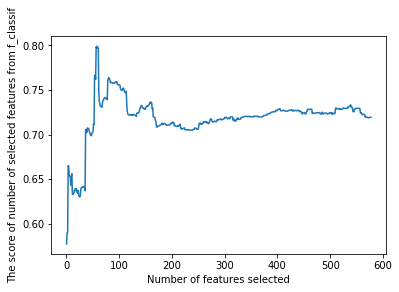

In [28]:
lsvc_1,lsvc_2,lsvc_3,lsvc_4,lsvc_5=select_kbest_f_classif_ausgabe(svm.LinearSVC())


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 24 170 217 234 421 499 528 532 568] are constant.
  UserWarning)


Maximale Genauigkeit(f_classif): 0.7986184909670563 ,   Die Anzahl der Merkmale: 61


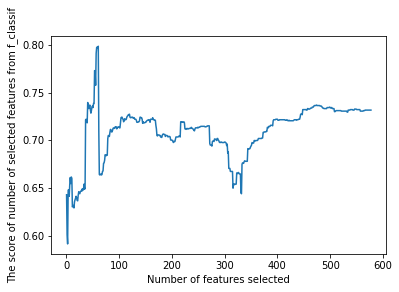

In [29]:
svc_1,svc_2,svc_3,svc_4,svc_5=select_kbest_f_classif_ausgabe(svm.SVC(kernel='linear'))



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 24 170 217 234 421 499 528 532 568] are constant.
  UserWarning)


Maximale Genauigkeit(f_classif): 0.8235919234856536 ,   Die Anzahl der Merkmale: 57


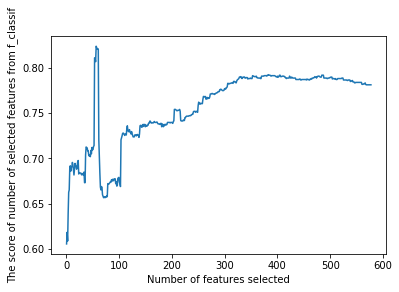

In [30]:
knn_1,knn_2,knn_3,knn_4,knn_5=select_kbest_f_classif_ausgabe(KNeighborsClassifier())


lda_1,lda_2,lda_3,lda_4,lda_5=select_kbest_f_classif_ausgabe(LinearDiscriminantAnalysis())



bnb_1,bnb_2,bnb_3,bnb_4,bnb_5=select_kbest_f_classif_ausgabe(BernoulliNB())

bnb_3



gnb_1,gnb_2,gnb_3,gnb_4,gnb_5=select_kbest_f_classif_ausgabe(GaussianNB())






def select_chi2(number,classifier):
    select_feature=SelectKBest(chi2,k=number)
    fit_data=select_feature.fit(abs(x_train),y_train.values.ravel())
    feature_name1=fit_data.get_support(indices=True)
    seleceted_feature_chi2=pd.DataFrame(x_train.columns[feature_name1])
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac_chi=accuracy_score(y_test.values.ravel(),clf.predict(x_test2))
    return ac_chi

def select_chi2_ausgabe(classifier):
    score_chi2=[select_chi2(i,classifier) for i in range(1,578)]
    maxi=max(score_chi2)
    anzahl=score_chi2.index(np.max(score_chi2))+1
    ausgabe=print('Maximale Genauigkeit(chi2):', maxi,',   Die Anzahl der Merkmale:',anzahl)
    select_feature_chi2=SelectKBest(chi2,k=anzahl)
    fit_data_chi2=select_feature_chi2.fit(abs(x_train),y_train.values.ravel())
    feature_name_chi2=fit_data_chi2.get_support(indices=True)
    selected_feature_chi2=pd.DataFrame(x_train.columns[feature_name_chi2])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from chi2")
    plt.plot(range(1, len(score_chi2) + 1), score_chi2)
    bild=plt.show()
    
    return ausgabe,bild,selected_feature_chi2,maxi,anzahl

chi2_lsvc_1,chi2_lsvc_2,chi2_lsvc_3,chi2_lsvc_4,chi2_lsvc_5=select_chi2_ausgabe(svm.LinearSVC())

chi2_svc_1,chi2_svc_2,chi2_svc_3,chi2_svc_4,chi2_svc_5=select_chi2_ausgabe(svm.SVC(kernel='linear'))

chi2_knn_1,chi2_knn_2,chi2_knn_3,chi2_knn_4,chi2_knn_5=select_chi2_ausgabe(KNeighborsClassifier())

chi2_lda_1,chi2_lda_2,chi2_lda_3,chi2_lda_4,chi2_lda_5=select_chi2_ausgabe(LinearDiscriminantAnalysis())









def select_f_regression(number,classifier):
    select_feature=SelectKBest(f_regression,k=number)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_name_regression=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac=accuracy_score(y_test.values.ravel(),clf.predict(x_test2))
    return ac
def select_f_regression_ausgabe(classifier):
    score_f_regression=[select_f_regression(i,classifier) for i in range(1,578)]
    maxi=max(score_f_regression)
    anzahl=score_f_regression.index(np.max(score_f_regression))+1
    ausgabe=print('Maximale Genauigkeit(f_regression):', maxi,',   Die Anzahl der Merkmale:',anzahl)
    select_feature_f_regression=SelectKBest(f_regression,k=anzahl)
    fit_data_f_regression=select_feature_f_regression.fit(x_train,y_train.values.ravel())
    feature_name_f_regression=fit_data_f_regression.get_support(indices=True)
    selected_feature_f_regression=pd.DataFrame(x_train.columns[feature_name_f_regression])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from f_regression")
    plt.plot(range(1, len(score_f_regression) + 1), score_f_regression)
    bild=plt.show()
    features_names=selected_feature_f_regression
    return ausgabe,bild,features_names,maxi,anzahl

f_re_lsvc_1,f_re_lsvc_2,f_re_lsvc_3,f_re_lsvc_4,f_re_lsvc_5=select_f_regression_ausgabe(svm.LinearSVC())

f_re_svc_1,f_re_svc_2,f_re_svc_3,f_re_svc_4,f_re_svc_5=select_f_regression_ausgabe(svm.SVC(kernel='linear'))

f_re_knn_1,f_re_knn_2,f_re_knn_3,f_re_knn_4,f_re_knn_5=select_f_regression_ausgabe(KNeighborsClassifier())

f_re_lda_1,f_re_lda_2,f_re_lda_3,f_re_lda_4,f_re_lda_5=select_f_regression_ausgabe(LinearDiscriminantAnalysis())

f_re_gnb_1,f_re_gnb_2,f_re_gnb_3,f_re_gnb_4,f_re_gnb_5=select_f_regression_ausgabe(GaussianNB())

f_re_bnb_1,f_re_bnb_2,f_re_bnb_3,f_re_bnb_4,f_re_bnb_5=select_f_regression_ausgabe(BernoulliNB())

#f_re_mlp_1,f_re_mlp_2,f_re_mlp_3,f_re_mlp_4,f_re_mlp_5=select_f_regression_ausgabe(MLPClassifier())







def SFM(classifier):
    clf_etc=svm.SVC(kernel='linear')
    clf_etc=clf_etc.fit(x_train,y_train.values.ravel())
    clf_etc.coef_
    model=SelectFromModel(clf_etc,prefit=True)
    name=model.get_support(indices=True)
    x_train2=model.transform(x_train)
    x_test2=model.transform(x_test)
    x_train2=pd.DataFrame(x_train2)
    x_train2.columns=x_train.columns[name]
    name_sfm=pd.DataFrame(x_train.columns[name])
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac_SFM=accuracy_score(y_test,clf.predict(x_test2)) 
    return ac_SFM,name_sfm
ac_sfm_dtc,name_sfm_dtc=SFM(tree.DecisionTreeClassifier())
print('Maximale Genauigkeit(SelectFromModel_decisiontree):', ac_sfm_dtc,',   Die Anzahl der Merkmale:',len(name_sfm_dtc))
print(name_sfm_dtc)


ac_sfm_knn,name_sfm_knn=SFM(KNeighborsClassifier(n_neighbors=5))
print('Maximale Genauigkeit(SelectFromModel_KNeighbors):', ac_sfm_knn,',   Die Anzahl der Merkmale:',len(name_sfm_knn))
print(name_sfm_knn)


ac_sfm_lsvc,name_sfm_lsvc=SFM(svm.LinearSVC())
print('Maximale Genauigkeit(SelectFromModel_lsvc:', ac_sfm_lsvc,',   Die Anzahl der Merkmale:',len(name_sfm_lsvc))
print(name_sfm_lsvc)



ac_sfm_svc,name_sfm_svc=SFM(svm.SVC(kernel='linear'))
print('Maximale Genauigkeit(SelectFromModel_svc:', ac_sfm_svc,',   Die Anzahl der Merkmale:',len(name_sfm_svc))
print(name_sfm_svc)

ac_sfm_lda,name_sfm_lda=SFM(LinearDiscriminantAnalysis())
print('Maximale Genauigkeit(SelectFromModel_lda):', ac_sfm_lda,',   Die Anzahl der Merkmale:',len(name_sfm_lda))
print(name_sfm_lda)



ac_sfm_bnb,name_sfm_bnb=SFM(BernoulliNB())
print('Maximale Genauigkeit(SelectFromModel_bnb):', ac_sfm_bnb,',   Die Anzahl der Merkmale:',len(name_sfm_bnb))
print(name_sfm_bnb)





def select_percent(number,classifier):
    select_feature=SelectPercentile(score_func=chi2,percentile=number)
    fit_data=select_feature.fit(abs(x_train),y_train)
    feature_name1=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf_rf_chi=classifier
    clf_rf_chi=clf_rf_chi.fit(x_train2,y_train.values.ravel())
    ac_chi=accuracy_score(y_test,clf_rf_chi.predict(x_test2))
    return ac_chi


def select_percent_ausgabe(classifier):
    score_percent=[select_percent(i,classifier) for i in range(1,100)]
    maxi=max(score_percent)
    percent=score_percent.index(np.max(score_percent))+1
    select_feature=SelectPercentile(score_func=chi2,percentile=score_percent.index(np.max(score_percent))+1)
    fit_data=select_feature.fit(abs(x_train),y_train.values.ravel())
    feature_name=fit_data.get_support(indices=True)
    selected_feature_percentile=pd.DataFrame(x_train.columns[feature_name])
    anzahl=len(selected_feature_percentile)
    ausgabe=print('Maximale Genauigkeit(percentile_chi2):', maxi,',  Die Anzahl der Merkmale:',anzahl,',  ', percent, '% der Merkmale ')
    plt.figure()
    plt.xlabel("Percent of features selected")
    plt.ylabel("The score of number of selected features from chi2 percentile via decisiontree")
    plt.plot(range(1, len(score_percent)+1), score_percent)
    bild=plt.show()
    features_names=selected_feature_percentile
    return ausgabe,bild,features_names,maxi,anzahl,percent



per_chi2_lsvc_1,per_chi2_lsvc_2,per_chi2_lsvc_3,per_chi2_lsvc_4,per_chi2_lsvc_5,per_chi2_lsvc_6=select_percent_ausgabe(svm.LinearSVC())




per_chi2_svc_1,per_chi2_svc_2,per_chi2_svc_3,per_chi2_svc_4,per_chi2_svc_5,per_chi2_svc_6=select_percent_ausgabe(svm.SVC(kernel='linear'))





per_chi2_knn_1,per_chi2_knn_2,per_chi2_knn_3,per_chi2_knn_4,per_chi2_knn_5,per_chi2_knn_6=select_percent_ausgabe(KNeighborsClassifier())

per_chi2_lda_1,per_chi2_lda_2,per_chi2_lda_3,per_chi2_lda_4,per_chi2_lda_5,per_chi2_lda_6=select_percent_ausgabe(LinearDiscriminantAnalysis())

per_chi2_bnb_1,per_chi2_bnb_2,per_chi2_bnb_3,per_chi2_bnb_4,per_chi2_bnb_5,per_chi2_bnb_6=select_percent_ausgabe(BernoulliNB())

per_chi2_gnb_1,per_chi2_gnb_2,per_chi2_gnb_3,per_chi2_gnb_4,per_chi2_gnb_5,per_chi2_gnb_6=select_percent_ausgabe(GaussianNB())

#per_chi2_mlp_1,per_chi2_mlp_2,per_chi2_mlp_3,per_chi2_mlp_4,per_chi2_mlp_5,per_chi2_mlp_6=select_percent_ausgabe(MLPClassifier())

def select_percent_f_classif(percent,classifier):
    select_feature=SelectPercentile(score_func=f_classif,percentile=percent)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_name1=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac_chi=accuracy_score(y_test,clf.predict(x_test2))
    return ac_chi


def select_percent_f_classif_ausgabe(classifier):
    score_percent=[select_percent_f_classif(i,classifier) for i in range(1,100)]
    maxi=max(score_percent)
    percent=score_percent.index(np.max(score_percent))+1
    select_feature=SelectPercentile(score_func=f_classif,percentile=score_percent.index(maxi)+1)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_index=fit_data.get_support(indices=True)
    features=pd.DataFrame(x_train.columns[feature_index])
    anzahl=len(features)
    ausgabe=print('Maximale Genauigkeit(percentile_f_classif):', maxi,',  Die Anzahl der Merkmale:',anzahl,',  ' ,percent,'% der Merkmale ')
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from f_classif")
    plt.plot(range(1, len(score_percent) + 1), score_percent)
    bild=plt.show()
    return ausgabe,bild,features,maxi,anzahl,percent
    
    
    
    
    

per_f_classif_lsvm_1,per_f_classif_lsvm_2,per_f_classif_lsvm_3,per_f_classif_lsvm_4,per_f_classif_lsvm_5,per_f_classif_lsvm_6=select_percent_f_classif_ausgabe(svm.LinearSVC())

print(per_f_classif_lsvm_3)

per_f_classif_svm_1,per_f_classif_svm_2,per_f_classif_svm_3,per_f_classif_svm_4,per_f_classif_svm_5,per_f_classif_svm_6=select_percent_f_classif_ausgabe(svm.SVC(kernel='linear'))

print(per_f_classif_svm_3)

per_f_classif_knn_1,per_f_classif_knn_2,per_f_classif_knn_3,per_f_classif_knn_4,per_f_classif_knn_5,per_f_classif_knn_6=select_percent_f_classif_ausgabe(KNeighborsClassifier())

per_f_classif_lda_1,per_f_classif_lda_2,per_f_classif_lda_3,per_f_classif_lda_4,per_f_classif_lda_5,per_f_classif_lda_6=select_percent_f_classif_ausgabe(LinearDiscriminantAnalysis())

per_f_classif_gnb_1,per_f_classif_gnb_2,per_f_classif_gnb_3,per_f_classif_gnb_4,per_f_classif_gnb_5,per_f_classif_gnb_6=select_percent_f_classif_ausgabe(GaussianNB())

def select_percent_f_regression(percent,classifier):
    select_feature=SelectPercentile(score_func=f_regression,percentile=percent)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_name1=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac_chi=accuracy_score(y_test,clf.predict(x_test2))
    return ac_chi


def select_percent_f_regression_ausgabe(classifier):
    score_percent=[select_percent_f_regression(i,classifier) for i in range(1,100)]
    maxi=max(score_percent)
    percent=score_percent.index(np.max(score_percent))+1
    select_feature=SelectPercentile(score_func=f_regression,percentile=score_percent.index(maxi)+1)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_index=fit_data.get_support(indices=True)
    features=pd.DataFrame(x_train.columns[feature_index])
    anzahl=len(features)
    ausgabe=print('Maximale Genauigkeit(percentile_f_regression):', maxi,',  Die Anzahl der Merkmale:',anzahl,',  ' ,percent,'% der Merkmale ')
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from f_regression via percentile")
    plt.plot(range(1, len(score_percent) + 1), score_percent)
    bild=plt.show()
    return ausgabe,bild,features,maxi,anzahl,percent
    

per_f_re_lsvc_1,per_f_re_lsvc_2,per_f_re_lsvc_3,per_f_re_lsvc_4,per_f_re_lsvc_5,per_f_re_lsvc_6=select_percent_f_regression_ausgabe(svm.LinearSVC())

print(per_f_re_lsvc_3)

per_f_re_svc_1,per_f_re_svc_2,per_f_re_svc_3,per_f_re_svc_4,per_f_re_svc_5,per_f_re_svc_6=select_percent_f_regression_ausgabe(svm.SVC(kernel='linear'))

per_f_re_knn_1,per_f_re_knn_2,per_f_re_knn_3,per_f_re_knn_4,per_f_re_knn_5,per_f_re_knn_6=select_percent_f_regression_ausgabe(KNeighborsClassifier())

per_f_re_lda_1,per_f_re_lda_2,per_f_re_lda_3,per_f_re_lda_4,per_f_re_lda_5,per_f_re_lda_6=select_percent_f_regression_ausgabe(LinearDiscriminantAnalysis())

#per_f_re_mlp_1,per_f_re_mlp_2,per_f_re_mlp_3,per_f_re_mlp_4,per_f_re_mlp_5,per_f_re_mlp_6=select_percent_f_regression_ausgabe(MLPClassifier())

per_f_re_bnb_1,per_f_re_bnb_2,per_f_re_bnb_3,per_f_re_bnb_4,per_f_re_bnb_5,per_f_re_bnb_6=select_percent_f_regression_ausgabe(BernoulliNB())

per_f_re_gnb_1,per_f_re_gnb_2,per_f_re_gnb_3,per_f_re_gnb_4,per_f_re_gnb_5,per_f_re_gnb_6=select_percent_f_regression_ausgabe(GaussianNB())



a=[i*0.01+0.01 for i in range(100)]
def select_fpr(i,classifier,Methode,x_eingabe):
    select_feature_fpr=SelectFpr(score_func=Methode,alpha=i)
    fit_data_fpr=select_feature_fpr.fit(x_eingabe,y_train.values.ravel())
    features_index_fpr=fit_data_fpr.get_support(indices=True)
    features_name_fpr=pd.DataFrame(x_train.columns[features_index_fpr])
    x_train2_fpr=fit_data_fpr.transform(x_train)
    x_test2_fpr=fit_data_fpr.transform(x_test)
    clf1_fpr=classifier
    clf1_fpr=clf1_fpr.fit(x_train2_fpr,y_train)
    acc_fpr=accuracy_score(y_test,clf1_fpr.predict(x_test2_fpr))
    return acc_fpr
def select_fpr_ausgabe(classifier,Methode,x_Eingabe):
    score_fpr=[select_fpr(i,classifier,Methode,x_Eingabe) for i in a]
    Alpha=a[score_fpr.index(max(score_fpr))]
    maxi=max(score_fpr)
    select_feature_fpr=SelectFpr(score_func=Methode,alpha=Alpha)
    fit_data_fpr=select_feature_fpr.fit(x_Eingabe,y_train.values.ravel())
    features_index_fpr=fit_data_fpr.get_support(indices=True)
    features_name_fpr=pd.DataFrame(x_train.columns[features_index_fpr])
    ausgabe=print('Maximale Genauigkeit:', maxi,',  Die Anzahl der Merkmale:',len(features_name_fpr),', alpha=',Alpha)
    plt.figure()
    plt.xlabel('Alpha of features selected')
    plt.ylabel('score of number of feature via fpr')
    bild=plt.plot(a,score_fpr)
    features=features_name_fpr
    return ausgabe,bild,features,maxi,len(features_name_fpr),Alpha

fpr_chi2_lsvc_1,fpr_chi2_lsvc_2,fpr_chi2_lsvc_3,fpr_chi2_lsvc_4,fpr_chi2_lsvc_5,fpr_chi2_lsvc_6=select_fpr_ausgabe(svm.LinearSVC(),chi2,abs(x_train))

fpr_chi2_knn_1,fpr_chi2_knn_2,fpr_chi2_knn_3,fpr_chi2_knn_4,fpr_chi2_knn_5,fpr_chi2_knn_6=select_fpr_ausgabe(KNeighborsClassifier(),chi2,abs(x_train))

fpr_chi2_lda_1,fpr_chi2_lda_2,fpr_chi2_lda_3,fpr_chi2_lda_4,fpr_chi2_lda_5,fpr_chi2_lda_6=select_fpr_ausgabe(LinearDiscriminantAnalysis(),chi2,abs(x_train))

fpr_f_classif_lsvc_1,fpr_f_classif_lsvc_2,fpr_f_classif_lsvc_3,fpr_f_classif_lsvc_4,fpr_f_classif_lsvc_5,fpr_f_classif_lsvc_6=select_fpr_ausgabe(svm.LinearSVC(),f_classif,x_train)

fpr_f_classif_knn_1,fpr_f_classif_knn_2,fpr_f_classif_knn_3,fpr_f_classif_knn_4,fpr_f_classif_knn_5,fpr_f_classif_knn_6=select_fpr_ausgabe(KNeighborsClassifier(),f_classif,x_train)


fpr_f_classif_lda_1,fpr_f_classif_lda_2,fpr_f_classif_lda_3,fpr_f_classif_lda_4,fpr_f_classif_lda_5,fpr_f_classif_lda_6=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train)




fpr_f_regression_lsvc_1,fpr_f_regression_lsvc_2,fpr_f_regression_lsvc_3,fpr_f_regression_lsvc_4,fpr_f_regression_lsvc_5,fpr_f_regression_lsvc_6=select_fpr_ausgabe(svm.LinearSVC(),f_regression,x_train)


fpr_f_regression_knn_1,fpr_f_regression_knn_2,fpr_f_regression_knn_3,fpr_f_regression_knn_4,fpr_f_regression_knn_5,fpr_f_regression_knn_6=select_fpr_ausgabe(KNeighborsClassifier(),f_regression,x_train)



fpr_f_regression_lda_1,fpr_f_regression_lda_1_2,fpr_f_regression_lda_3,fpr_f_regression_lda_4,fpr_f_regression_lda_5,fpr_f_regression_lda_6=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_regression,x_train)




a=[i*0.01+0.01 for i in range(100)]
def select_fdr(i,classifier,Methode,x_eingabe):
    select_feature_fdr=SelectFdr(score_func=Methode,alpha=i)
    fit_data_fdr=select_feature_fdr.fit(x_eingabe,y_train.values.ravel())
    features_index_fdr=fit_data_fdr.get_support(indices=True)
    features_name_fdr=pd.DataFrame(x_train.columns[features_index_fdr])
    x_train2_fdr=fit_data_fdr.transform(x_train)
    x_test2_fdr=fit_data_fdr.transform(x_test)
    clf1_fdr=classifier
    clf1_fdr=clf1_fdr.fit(x_train2_fdr,y_train)
    acc_fdr=accuracy_score(y_test,clf1_fdr.predict(x_test2_fdr))
    return acc_fdr
def select_fdr_ausgabe(classifier,Methode,x_Eingabe):
    score_fdr=[select_fdr(i,classifier,Methode,x_Eingabe) for i in a]
    Alpha=a[score_fdr.index(max(score_fdr))]
    maxi=max(score_fdr)
    select_feature_fdr=SelectFdr(score_func=Methode,alpha=Alpha)
    fit_data_fdr=select_feature_fdr.fit(x_Eingabe,y_train.values.ravel())
    features_index_fdr=fit_data_fdr.get_support(indices=True)
    features_name_fdr=pd.DataFrame(x_train.columns[features_index_fdr])
    ausgabe=print('Maximale Genauigkeit:', maxi,',  Die Anzahl der Merkmale:',len(features_name_fdr),', alpha=',Alpha)
    plt.figure()
    plt.xlabel('Alpha of features selected')
    plt.ylabel('score of number of feature form fdr')
    bild=plt.plot(a,score_fdr)
    features=features_name_fdr
    return ausgabe,bild,features,maxi,len(features_name_fdr),Alpha

fdr_f_regression_lsvc_1,fdr_f_regression_lsvc_2,fdr_f_regression_lsvc_3,fdr_f_regression_lsvc_4,fdr_f_regression_lsvc_5,fdr_f_regression_lsvc_6=select_fdr_ausgabe(svm.LinearSVC(),f_regression,x_train)



fdr_f_regression_lda_1,fdr_f_regression_lda_2,fdr_f_regression_lda_3,fdr_f_regression_lda_4,fdr_f_regression_lda_5,fdr_f_regression_lda_6=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_regression,x_train)




fdr_f_classif_lsvc_1,fdr_f_classif_lsvc_2,fdr_f_classif_lsvc_3,fdr_f_classif_lsvc_4,fdr_f_classif_lsvc_5,fdr_f_classif_lsvc_6=select_fdr_ausgabe(svm.LinearSVC(),f_classif,x_train)




fdr_f_classif_lda_1,fdr_f_classif_lda_2,fdr_f_classif_lda_3,fdr_f_classif_lda_4,fdr_f_classif_lda_5,fdr_f_classif_lda_6=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train)




fdr_chi2_lsvc_1,fdr_chi2_lsvc_2,fdr_chi2_lsvc_3,fdr_chi2_lsvc_4,fdr_chi2_lsvc_5,fdr_chi2_lsvc_6=select_fdr_ausgabe(svm.LinearSVC(),chi2,abs(x_train))




fdr_chi2_lda_1,fdr_chi2_lda_2,fdr_chi2_lda_3,fdr_chi2_lda_4,fdr_chi2_lda_5,fdr_chi2_lda_6=select_fdr_ausgabe(LinearDiscriminantAnalysis(),chi2,abs(x_train))




a=[i*0.01+0.01 for i in range(100)]
def select_fwe(i,classifier,Methode,x_eingabe):
    select_feature=SelectFwe(score_func=Methode,alpha=i)
    fit_data=select_feature.fit(x_eingabe,y_train.values.ravel())
    features_index=fit_data.get_support(indices=True)
    features_name=pd.DataFrame(x_train.columns[features_index])
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf1=classifier
    clf1=clf1.fit(x_train2,y_train)
    acc=accuracy_score(y_test,clf1.predict(x_test2))
    return acc
def select_fwe_ausgabe(classifier,Methode,x_Eingabe):
    score=[select_fwe(i,classifier,Methode,x_Eingabe) for i in a]
    Alpha=a[score.index(max(score))]
    maxi=max(score)
    select_feature=SelectFwe(score_func=Methode,alpha=Alpha)
    fit_data=select_feature.fit(x_Eingabe,y_train.values.ravel())
    features_index=fit_data.get_support(indices=True)
    features_name=pd.DataFrame(x_train.columns[features_index])
    ausgabe=print('Maximale Genauigkeit:', maxi,',  Die Anzahl der Merkmale:',len(features_name),', alpha=',Alpha)
    plt.figure()
    plt.xlabel('Alpha of features selected')
    plt.ylabel('score of number of feature form fwe')
    bild=plt.plot(a,score)
    features=features_name
    return ausgabe,bild,features,maxi,len(features_name),Alpha

fwe_f_regression_lsvc_1,fwe_f_regression_lsvc_2,fwe_f_regression_lsvc_3,fwe_f_regression_lsvc_4,fwe_f_regression_lsvc_5,fwe_f_regression_lsvc_6=select_fwe_ausgabe(svm.LinearSVC(),f_regression,x_train)




fwe_f_regression_lda_1,fwe_f_regression_lda_2,fwe_f_regression_lda_3,fwe_f_regression_lda_4,fwe_f_regression_lda_5,fwe_f_regression_lda_6=select_fwe_ausgabe(LinearDiscriminantAnalysis(),f_regression,x_train)



fwe_f_classif_lsvc_1,fwe_f_classif_lsvc_2,fwe_f_classif_lsvc_3,fwe_f_classif_lsvc_4,fwe_f_classif_lsvc_5,fwe_f_classif_lsvc_6=select_fwe_ausgabe(svm.LinearSVC(),f_classif,x_train)





fwe_f_classif_lda_1,fwe_f_classif_lda_2,fwe_f_classif_lda_3,fwe_f_classif_lda_4,fwe_f_classif_lda_5,fwe_f_classif_lda_6=select_fwe_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train)




fwe_chi2_lsvc_1,fwe_chi2_lsvc_2,fwe_chi2_lsvc_3,fwe_chi2_lsvc_4,fwe_chi2_lsvc_5,fwe_chi2_lsvc_6=select_fwe_ausgabe(svm.LinearSVC(),chi2,abs(x_train))



fwe_chi2_lda_1,fwe_chi2_lda_2,fwe_chi2_lda_3,fwe_chi2_lda_4,fwe_chi2_lda_5,fwe_chi2_lda_6=select_fwe_ausgabe(LinearDiscriminantAnalysis(),chi2,abs(x_train))







def rfecv(classifier1,classifier2,data,label,data_test,label_test):
    clf=classifier1
    rfecv=RFECV(estimator=clf,step=1,cv=5,scoring='accuracy')
    rfecv=rfecv.fit(data,label.values.ravel())
    anzahl=rfecv.n_features_
    x_train2=rfecv.transform(data)
    x_test2=rfecv.transform(data_test)
    clf2=classifier2
    clf2=clf2.fit(x_train2,label.values.ravel())
    ac=accuracy_score(label_test.values.ravel(),clf2.predict(x_test2))
    ausgabe=print('Maximale Genauigkeit(rfecv):',ac,',   Die Anzahl der Merkmale:',anzahl)
    features=pd.DataFrame(data.columns[rfecv.support_])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score of number of selected features")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    bild=plt.show()
    return ausgabe,bild,features,ac,anzahl




rfecv_lsvc_lsvc_1,rfecv_lsvc_lsvc_2,rfecv_lsvc_lsvc_3,rfecv_lsvc_lsvc_4,rfecv_lsvc_lsvc_5=rfecv(svm.LinearSVC(),svm.LinearSVC(),x_train,y_train,x_test,y_test)






rfecv_lsvc_lda_1,rfecv_lsvc_lda_2,rfecv_lsvc_lda_3,rfecv_lsvc_lda_4,rfecv_lsvc_lda_5=rfecv(svm.LinearSVC(),LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test)




rfecv_lsvc_knn_1,rfecv_lsvc_knn_2,rfecv_lsvc_knn_3,rfecv_lsvc_knn_4,rfecv_lsvc_knn_5=rfecv(svm.LinearSVC(),KNeighborsClassifier(),x_train,y_train,x_test,y_test)




rfecv_lda_lsvc_1,rfecv_lda_lsvc_2,rfecv_lda_lsvc_3,rfecv_lda_lsvc_4,rfecv_lda_lsvc_5=rfecv(LinearDiscriminantAnalysis(),svm.LinearSVC(),x_train,y_train,x_test,y_test)




rfecv_lda_lda_1,rfecv_lda_lda_2,rfecv_lda_lda_3,rfecv_lda_lda_4,rfecv_lda_lda_5=rfecv(LinearDiscriminantAnalysis(),LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test)






rfecv_lda_knn_1,rfecv_lda_knn_2,rfecv_lda_knn_3,rfecv_lda_knn_4,rfecv_lda_knn_5=rfecv(LinearDiscriminantAnalysis(),KNeighborsClassifier(),x_train,y_train,x_test,y_test)




def variance_threshold(p,classifier,data,label,data_test,label_test):
    selector=VarianceThreshold(threshold=(p*(1-p)))
    fit_data=selector.fit(data,label)
    feature_index=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(data)
    x_test2=fit_data.transform(data_test)
    clf=classifier
    clf=clf.fit(x_train2,label)
    acc=accuracy_score(label_test,clf.predict(x_test2))
    return acc
def variance_threshold_ausgabe(classifier,data,label,data_test,label_test,satz):
    p_variance=[i*0.1+0.1 for i in range(10)]
    score=[variance_threshold(p,classifier,data,label,data_test,label_test) for p in p_variance ]
    maxi=max(score)
    p_max=p_variance[score.index(maxi)]
    selector=VarianceThreshold(threshold=p_max*(1-p_max))
    fit_data=selector.fit(data,label)
    feature_index=fit_data.get_support(indices=True)
    selected_feature=pd.DataFrame(data.columns[feature_index])
    print('Maximale Genauigkeit:','(',satz,')',':', maxi,',  Die Anzahl der Merkmale:',len(selected_feature),', p=',p_max)
    plt.figure()
    plt.xlabel('Number of features selected')
    plt.ylabel('The score of number of selected features')
    plt.plot(p_variance,score)
    return selected_feature, maxi, len(selected_feature), p_max
    

vt_lsvc_1,vt_lsvc_2,vt_lsvc_3,vt_lsvc_4=variance_threshold_ausgabe(svm.LinearSVC(),x_train,y_train,x_test,y_test,'VarianceThreshold_lsvc')



p_variance.index(max([variance_threshold(p,svm.LinearSVC(),x_train,y_train,x_test,y_test) for p in p_variance ]))

variance_threshold(1,svm.LinearSVC(),x_train,y_train,x_test,y_test,)

def select_kbest(number,classifier,methode,x_eingabe):
    select_feature=SelectKBest(methode,k=number)
    fit_data=select_feature.fit(x_eingabe,y_train.values.ravel())
    feature_name1=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(x_train)
    x_test2=fit_data.transform(x_test)
    clf=classifier
    clf=clf.fit(x_train2,y_train.values.ravel())
    ac=accuracy_score(y_test.values.ravel(),clf.predict(x_test2))
    np.seterr(divide='ignore', invalid='ignore')
    return ac
def select_kbest_ausgabe(classifier,methode,x_eingabe):
    score=[select_kbest(i,classifier,methode,x_eingabe) for i in range(1,578)]
    maxi=max(score)
    anzahl=score.index(np.max(score))+1
    ausgabe=print('Maximale Genauigkeit:', maxi,',   Die Anzahl der Merkmale:',anzahl)
    select_feature=SelectKBest(methode,k=anzahl)
    fit_data=select_feature.fit(x_train,y_train.values.ravel())
    feature_name=fit_data.get_support(indices=True)
    selected_feature=pd.DataFrame(x_train.columns[feature_name])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features")
    plt.plot(range(1, len(score) + 1), score)
    bild=plt.show()
    
    return ausgabe,bild,selected_feature,maxi,anzahl

kbest_mutual_c_lsvc_1,kbest_mutual_c_lsvc_2,kbest_mutual_c_lsvc_3,kbest_mutual_c_lsvc_4,kbest_mutual_c_lsvc_5=select_kbest_ausgabe(svm.LinearSVC(),mutual_info_classif,x_train)

kbest_mutual_c_svc_1,kbest_mutual_c_svc_2,kbest_mutual_c_svc_3,kbest_mutual_c_svc_4,kbest_mutual_c_svc_5=select_kbest_ausgabe(svm.SVC(kernel='linear'),mutual_info_classif,x_train)

kbest_mutual_c_lda_1,kbest_mutual_c_lda_2,kbest_mutual_c_lda_3,kbest_mutual_c_lda_4,kbest_mutual_c_lda_5=select_kbest_ausgabe(LinearDiscriminantAnalysis(),mutual_info_classif,x_train)

kbest_mutual_r_lsvc_1,kbest_mutual_r_lsvc_2,kbest_mutual_r_lsvc_3,kbest_mutual_r_lsvc_4,kbest_mutual_r_lsvc_5=select_kbest_ausgabe(svm.LinearSVC(),mutual_info_regression,x_train)


kbest_mutual_r_lda_1,kbest_mutual_r_lda_2,kbest_mutual_r_lda_3,kbest_mutual_r_lda_4,kbest_mutual_r_lda_5=select_kbest_ausgabe(LinearDiscriminantAnalysis(),mutual_info_regression,x_train)







Ausgabe={'die höchste Genauigkeit':[lsvc_4,svc_4,knn_4,lda_4,bnb_4,gnb_4,chi2_lsvc_4,chi2_svc_4,chi2_knn_4,chi2_lda_4,f_re_lsvc_4,f_re_svc_4,f_re_knn_4,f_re_lda_4,f_re_gnb_4,f_re_bnb_4,ac_sfm_knn,ac_sfm_lsvc,ac_sfm_svc,ac_sfm_lda,ac_sfm_bnb,per_chi2_lsvc_4,per_chi2_svc_4,per_chi2_knn_4,per_chi2_lda_4,per_chi2_bnb_4,per_chi2_gnb_4,per_f_classif_lsvm_4,per_f_classif_svm_4,per_f_classif_knn_4,per_f_classif_lda_4,per_f_classif_gnb_4,per_f_re_lsvc_4,per_f_re_svc_4,per_f_re_knn_4,per_f_re_lda_4,per_f_re_bnb_4,per_f_re_gnb_4,fpr_chi2_lsvc_4,fpr_chi2_knn_4,fpr_chi2_lda_4,fpr_f_classif_lsvc_4,fpr_f_classif_knn_4,fpr_f_classif_lda_4,fpr_f_regression_lsvc_4,fpr_f_regression_knn_4,fpr_f_regression_lda_4,fdr_f_classif_lsvc_4,fdr_f_classif_lda_4,fdr_f_regression_lsvc_4,fdr_f_regression_lda_4,fdr_chi2_lsvc_4,fdr_chi2_lda_4,fwe_f_classif_lsvc_4,fwe_f_classif_lda_4,fwe_f_regression_lsvc_4,fwe_f_regression_lda_4,fwe_chi2_lsvc_4,fwe_chi2_lda_4,rfecv_lsvc_4,rfecv_svc_4,rfecv_lda_4,kbest_mutual_c_lsvc_4,kbest_mutual_c_svc_4,kbest_mutual_c_lda_4,kbest_mutual_r_lsvc_4,kbest_mutual_r_lda_4],
         'Die Anzahl der Merkmale':[lsvc_5,svc_5,knn_5,lda_5,bnb_5,gnb_5,chi2_lsvc_5,chi2_svc_5,chi2_knn_5,chi2_lda_5,f_re_lsvc_5,f_re_svc_5,f_re_knn_5,f_re_lda_5,f_re_gnb_5,f_re_bnb_5,len(name_sfm_knn),len(name_sfm_lsvc),len(name_sfm_svc),len(name_sfm_lda),len(name_sfm_bnb),per_chi2_lsvc_5,per_chi2_svc_5,per_chi2_knn_5,per_chi2_lda_5,per_chi2_bnb_5,per_chi2_gnb_5,per_f_classif_lsvm_5,per_f_classif_svm_5,per_f_classif_knn_5,per_f_classif_lda_5,per_f_classif_gnb_5,per_f_re_lsvc_5,per_f_re_svc_5,per_f_re_knn_5,per_f_re_lda_5,per_f_re_bnb_5,per_f_re_gnb_5,fpr_chi2_lsvc_5,fpr_chi2_knn_5,fpr_chi2_lda_5,fpr_f_classif_lsvc_5,fpr_f_classif_knn_5,fpr_f_classif_lda_5,fpr_f_regression_lsvc_5,fpr_f_regression_knn_5,fpr_f_regression_lda_5,fdr_f_classif_lsvc_5,fdr_f_classif_lda_5,fdr_f_regression_lsvc_5,fdr_f_regression_lda_5,fdr_chi2_lsvc_5,fdr_chi2_lda_5,fwe_f_classif_lsvc_5,fwe_f_classif_lda_5,fwe_f_regression_lsvc_5,fwe_f_regression_lda_5,fwe_chi2_lsvc_5,fwe_chi2_lda_5,rfecv_lsvc_5,rfecv_svc_5,rfecv_lda_5,kbest_mutual_c_lsvc_5,kbest_mutual_c_svc_5,kbest_mutual_c_lda_5,kbest_mutual_r_lsvc_5,kbest_mutual_r_lda_5]
        ,'Parameter':[lsvc_5,svc_5,knn_5,lda_5,bnb_5,gnb_5,chi2_lsvc_5,chi2_svc_5,chi2_knn_5,chi2_lda_5,f_re_lsvc_5,f_re_svc_5,f_re_knn_5,f_re_lda_5,f_re_gnb_5,f_re_bnb_5,'svm.SVC()','svm.SVC()','svm.SVC()','svm.SVC()','svm.SVC()',per_chi2_lsvc_6,per_chi2_svc_6,per_chi2_knn_6,per_chi2_lda_6,per_chi2_bnb_6,per_chi2_gnb_6,per_f_classif_lsvm_6,per_f_classif_svm_6,per_f_classif_knn_6,per_f_classif_lda_6,per_f_classif_gnb_6,per_f_re_lsvc_6,per_f_re_svc_6,per_f_re_knn_6,per_f_re_lda_6,per_f_re_bnb_6,per_f_re_gnb_6,fpr_chi2_lsvc_6,fpr_chi2_knn_6,fpr_chi2_lda_6,fpr_f_classif_lsvc_6,fpr_f_classif_knn_6,fpr_f_classif_lda_6,fpr_f_regression_lsvc_6,fpr_f_regression_knn_6,fpr_f_regression_lda_6,fdr_f_classif_lsvc_6,fdr_f_classif_lda_6,fdr_f_regression_lsvc_6,fdr_f_regression_lda_6,fdr_chi2_lsvc_6,fdr_chi2_lda_6,fwe_f_classif_lsvc_6,fwe_f_classif_lda_6,fwe_f_regression_lsvc_6,fwe_f_regression_lda_6,fwe_chi2_lsvc_6,fwe_chi2_lda_6,'/','/','/',kbest_mutual_c_lsvc_5,kbest_mutual_c_svc_5,kbest_mutual_c_lda_5,kbest_mutual_r_lsvc_5,kbest_mutual_r_lda_5]
        }
       

Ausgabe_Selektion=pd.DataFrame(data=Ausgabe)
Ausgabe_Selektion.index=['kbest_f_classif_lsvc','kbest_f_classif_svc','kbest_f_classif_knn','kbest_f_classif_lda','kbest_f_classif_bnb','kbest_f_classif_gnb','kbest_chi2_lsvc','kbest_chi2_svc','kbest_chi2_knn','kbest_chi2_lda','kbest_f_re_lsvc','kbest_f_re_svc','kbest_f_re_knn','kbest_f_re_lda','kbest_f_re_gnb','kbest_f_re_bnb','sfm_knn','sfm_lsvc','sfm_svc','sfm_lda','sfm_bnb','per_chi2_lsvc','per_chi2_svc','per_chi2_knn','per_chi2_lda','per_chi2_bnb','per_chi2_gnb','per_f_classif_lsvc','per_f_classif_svc','per_f_classif_knn','per_f_classif_lda','per_f_classif_gnb','per_f_re_lsvc','per_f_re_svc','per_f_re_knn','per_f_re_lda','per_f_re_bnb','per_f_re_gnb','fpr_chi2_lsvc','fpr_chi2_knn'
                         ,'fpr_chi2_lda','fpr_f_classif_lsvc','fpr_f_classif_knn','fpr_f_classif_lda','fpr_f_regression_lsvc','fpr_f_regression_knn','fpr_f_regression_lda','fdr_f_classif_lsvc','fdr_f_classif_lda','fdr_f_regression_lsvc','fdr_f_regression_lda','fdr_chi2_lsvc','fdr_chi2_lda','fwe_f_classif_lsvc','fwe_f_classif_lda','fwe_f_regression_lsvc','fwe_f_regression_lda','fwe_chi2_lsvc','fwe_chi2_lda','rfecv_lsvc','rfecv_svc','rfecv_lda','kbest_mutual_c_lsvc','kbest_mutual_c_svc','kbest_mutual_c_lda','kbest_mutual_r_lsvc','kbest_mutual_r_lda']
    

Ausgabe_Selektion

Ergebnis=Ausgabe_Selektion['die höchste Genauigkeit'][Ausgabe_Selektion['die höchste Genauigkeit']==Ausgabe_Selektion['die höchste Genauigkeit'].max()].index.tolist()

print(Ausgabe_Selektion.loc[Ergebnis],'\n','\n')
print(rfecv_lsvc_3)





